In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, learning_curve, LearningCurveDisplay, KFold, RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

In [2]:
df = pd.read_csv('../../venv/updated_pollution_dataset_2.csv')
df.head(20)

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0          27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1          26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2          39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3          41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4          29.4      93.8   10.3  22.7  45.1  11.8  2.03   
5          33.2      80.5   11.1  24.4  32.0  15.3  1.69   
6          26.3      65.7    1.3   5.5  18.3   5.9  0.85   
7          20.0      53.3    3.7  12.9  26.1   6.6  1.09   
8          28.6      53.7   28.9  34.0  23.2   4.5  1.02   
9          22.3      80.5    4.5  12.0  17.2   6.3  1.18   
10         22.9      75.4    4.5  10.4  18.4   3.7  0.96   
11         37.6      81.2   28.1  56.6  46.7  13.7  1.85   
12         37.8      97.2    0.6  24.6  37.1  11.7  1.13   
13         27.6      77.5    3.8  10.9   9.1   1.7  1.04   
14         25.6      58.3    0.4  -0.2  25.3   4.5  0.98   
15         24.6      48.4    8.3  15.4  23.3   4.6  1.03   
16         26.2      49.9    0.5   2.0  22.9   2.3  0.94   
17         22.6      62.1   16.4  21.3  17.6   4.8  0.93   
18         30.0      69.2    2.0   3.9  15.3   5.2  1.09   
19         37.6      72.2   10.1  16.6  32.2   6.3  1.85   

    Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            11.1                 551        Good  
1                            12.7                 303        Good  
2                             3.1                 674        Poor  
3                             4.6                 735        Poor  
4                             5.4                 486        Poor  
5                             4.9                 535        Poor  
6                            13.0                 529        Good  
7                            10.2                 538        Good  
8                            11.0                 508        Good  
9                            10.4                 232        Good  
10                           14.4                 359        Good  
11                            4.1                 560        Poor  
12                            7.7                 803        Poor  
13                           14.4                 520        Good  
14                           10.0                 536        Good  
15                           11.2                 461        Good  
16                           17.9                 581        Good  
17                           11.5                 324        Good  
18                           10.1                 297        Good  
19                            3.5                 637        Poor

In [3]:
df.shape

(4250, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [5]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean     30.021671    69.935576    20.057929    30.151482    26.399671   
std       7.079486    16.402863    25.140063    28.294709     9.415399   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      24.700000    57.800000     4.500000    11.700000    19.500000   
50%      28.700000    69.600000    11.600000    21.200000    25.000000   
75%      34.500000    80.200000    25.600000    37.800000    32.500000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  4250.000000  4250.000000                    4250.000000   
mean     10.004471     1.500428                       8.684212   
std       7.111211     0.586232                       3.778317   
min      -6.200000     0.650000                       2.500000   
25%       4.900000     1.010000                       5.225000   
50%       7.500000     1.310000                       9.700000   
75%      14.175000     1.930000                      11.300000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         4250.000000  
mean           497.283059  
std            158.671435  
min            188.000000  
25%            376.000000  
50%            494.000000  
75%            601.000000  
max            957.000000

In [6]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [7]:
num_duplicate_rows = df.duplicated().sum()
num_duplicate_rows

0

## Univariate Analysis

In [8]:
dataframe_copy = df.copy()
numerical_features = list(df.columns)[:-1]
numerical_features

['Temperature',
 'Humidity',
 'PM2.5',
 'PM10',
 'NO2',
 'SO2',
 'CO',
 'Proximity_to_Industrial_Areas',
 'Population_Density']

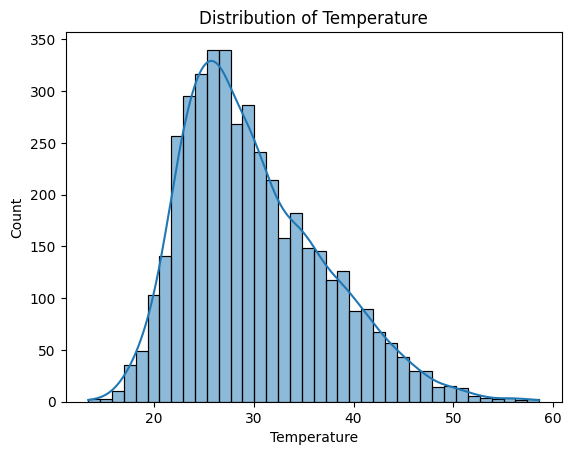

Skewness: 0.7569234916389664


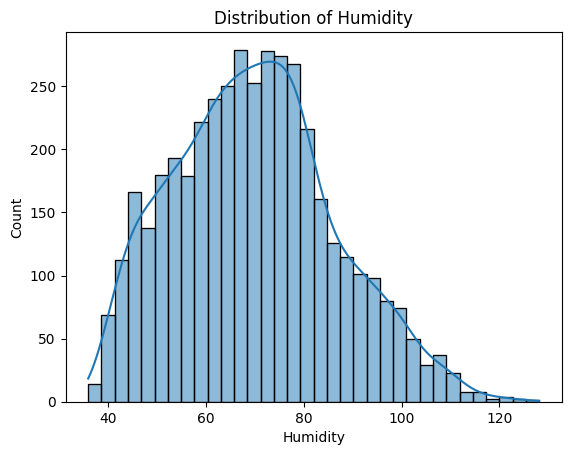

Skewness: 0.3157524732952262


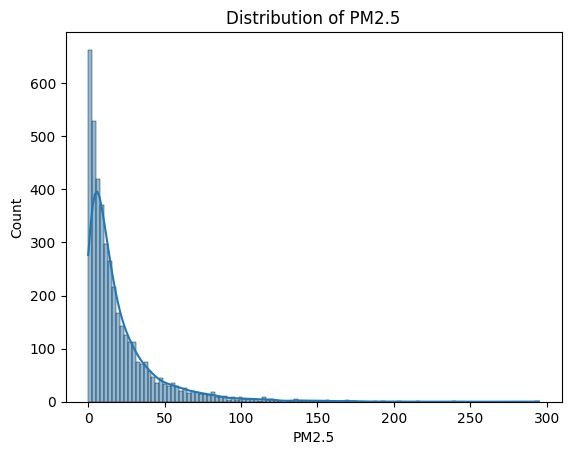

Skewness: 2.957185718916414


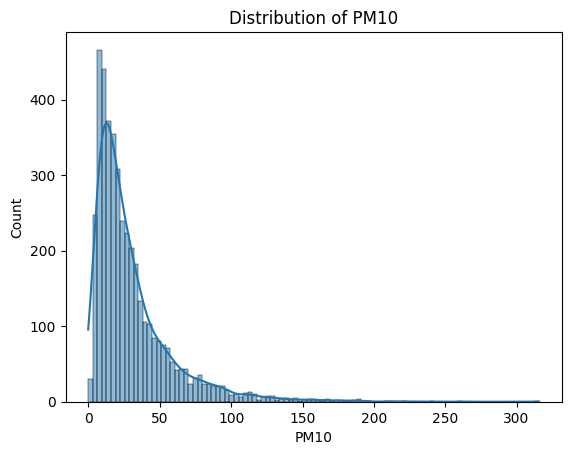

Skewness: 2.550170159648361


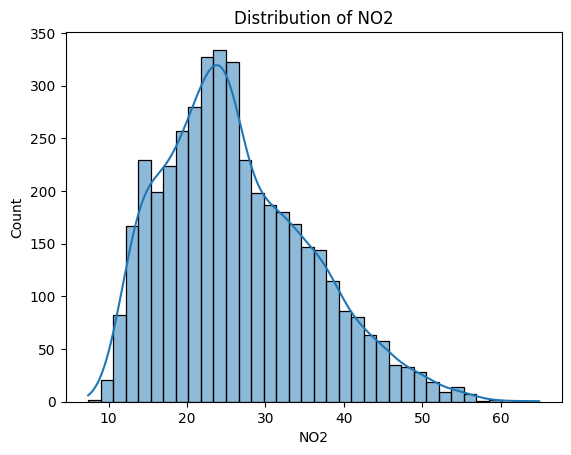

Skewness: 0.6345532638567069


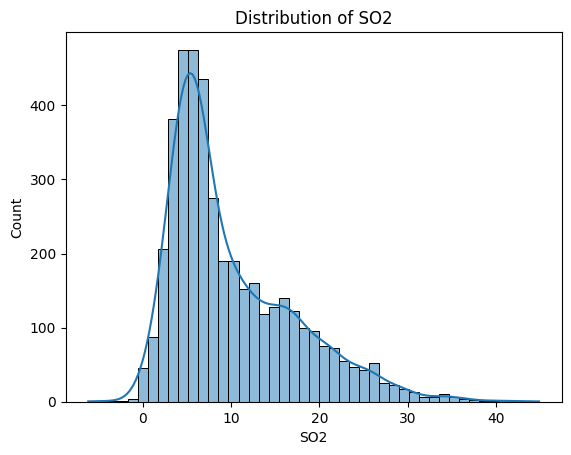

Skewness: 1.1762950274099426


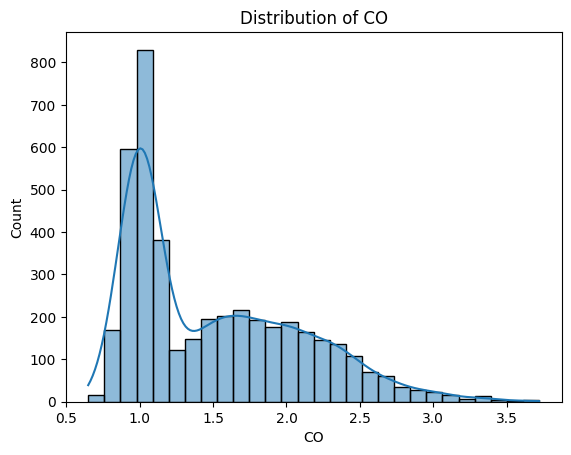

Skewness: 0.8350251090206471


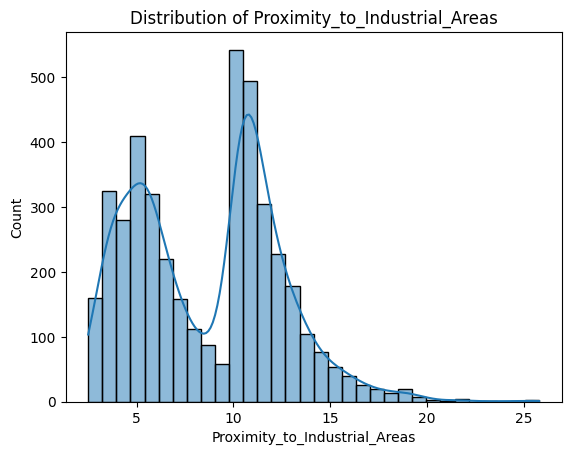

Skewness: 0.30197141265977145


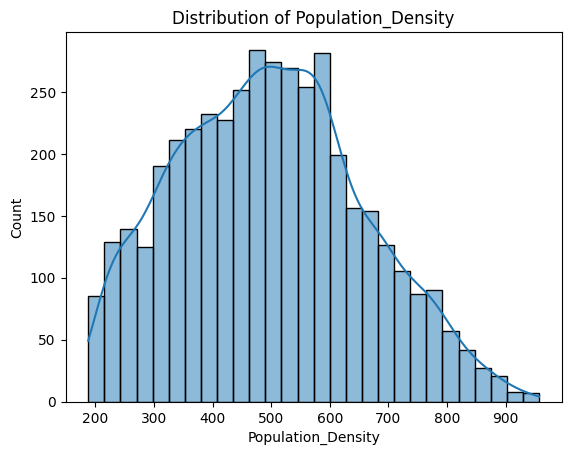

Skewness: 0.21767287186268033


In [9]:
for feature in numerical_features:
    plt.figure()
    sns.histplot(data=dataframe_copy, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

    skew_value = dataframe_copy[feature].skew()
    print(f"Skewness: {skew_value}")


Features "PM2.5", "PM10", SO2 are moderate to strong right skewed, with skewness > 1, while "CO","NO2","Temperature" are slightly right skewed with  0.5 < skewness < 1

#### Check for Outliers

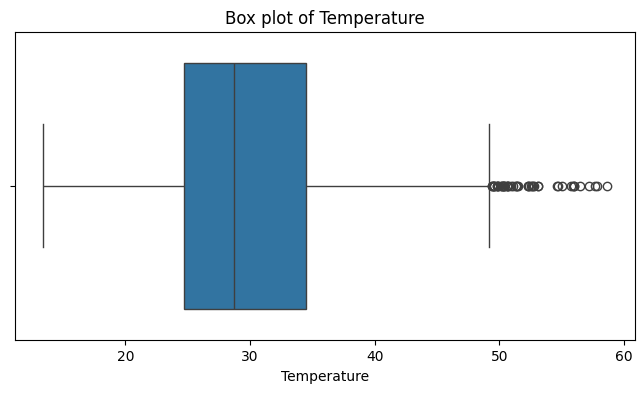

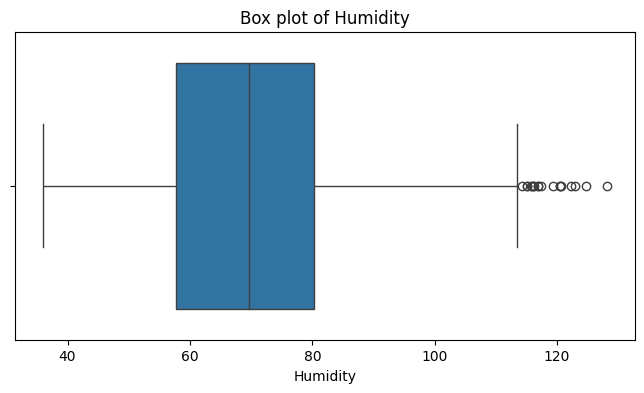

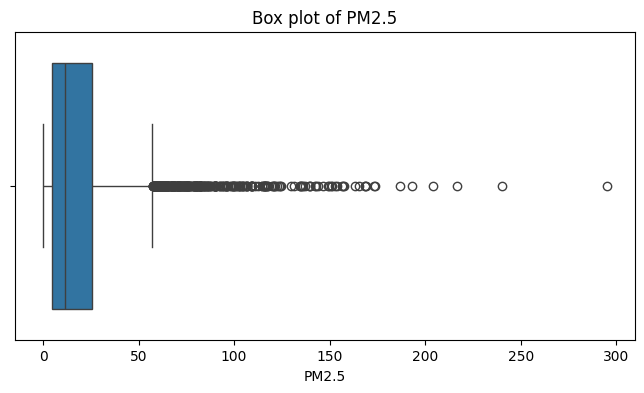

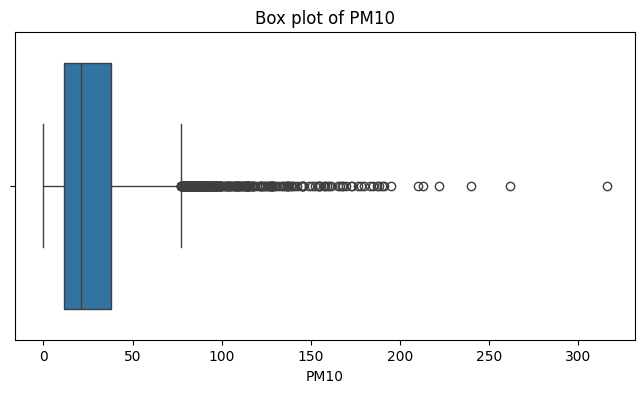

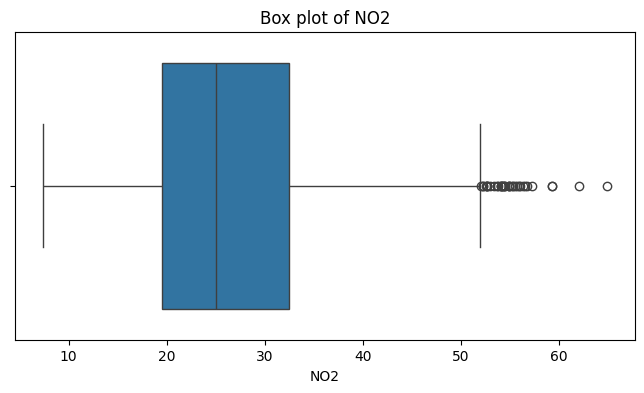

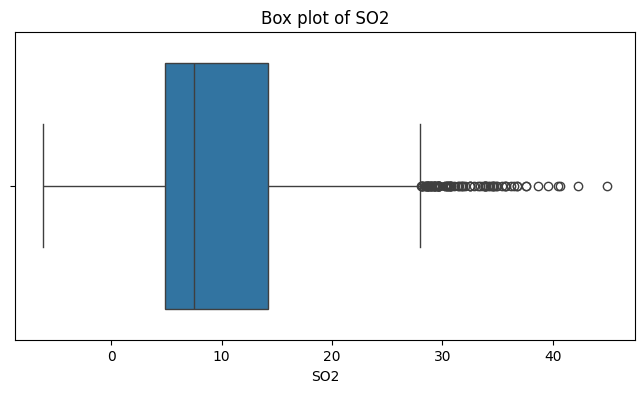

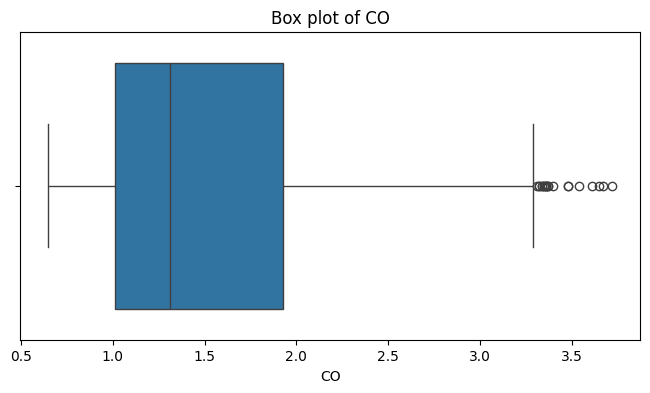

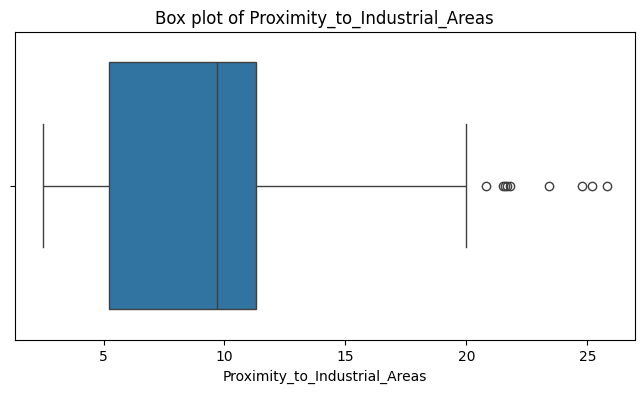

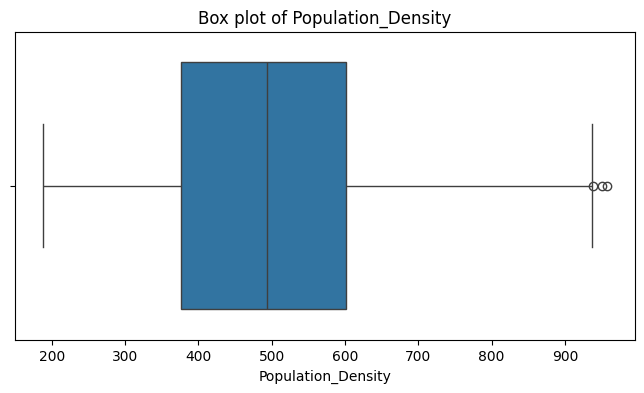

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(8,4)) #width, height
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

Observations based from boxplot distribution of each fetaure.
High outliers present in PM2.5, PM10, SO2. While Temperature, NO2, CO, humidity have medium amout of outliers, where as 
Proximity to industries, population density have very few outliers.

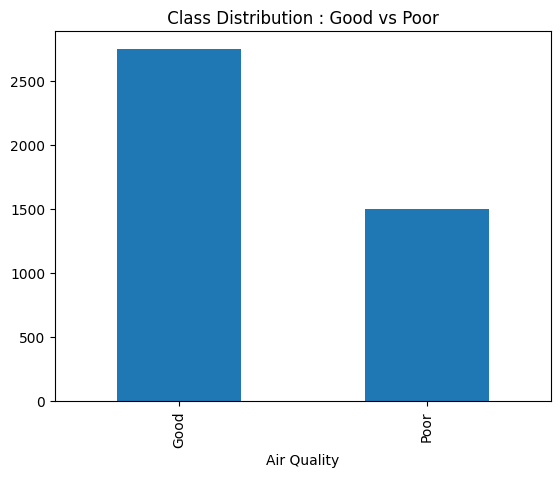

In [11]:
#Target Value Distribution

df['Air Quality'].value_counts().plot(kind='bar')
plt.title(f' Class Distribution : Good vs Poor ')
plt.show()

Distribution of the class: Good - 2750, Poor - 1500

# Bivariate Analysis

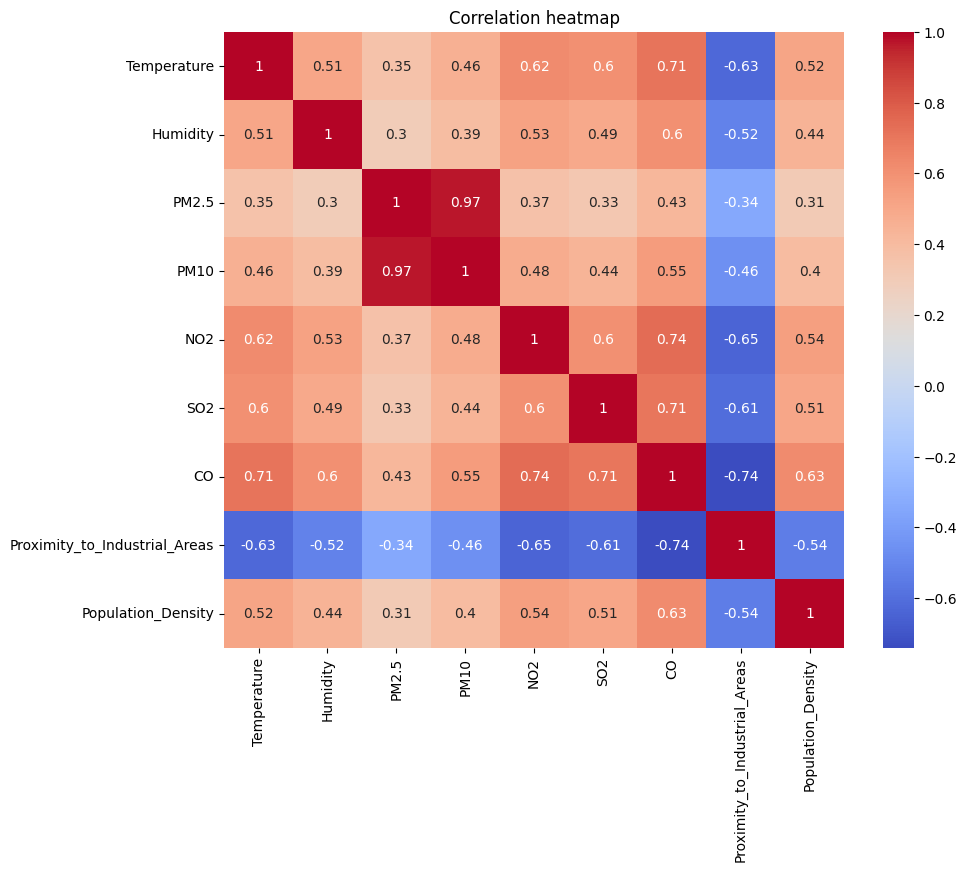

In [12]:
corr_matrix = (dataframe_copy.drop(columns='Air Quality')).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

corr(CO,Temperature) = 0.71, corr(CO,NO2) = 0.72, corr(CO, SO2) = 0.71, corr(CO, proximity) = -0.74
PM2.5 has weak correlation with every feature except PM10 -> corr(PM2.5, PM10) = 0.97
Proximity to industries has negative correlation with all other features, highest -> CO > NO2 > Temperature > SO2(-0.74 to -0.61)


Temperature has fair corrleation with pollutants except PM2.5, PM10, avg positive with humidity, population density
humidity, population density; NO2, SO2 not much intesrting trend.

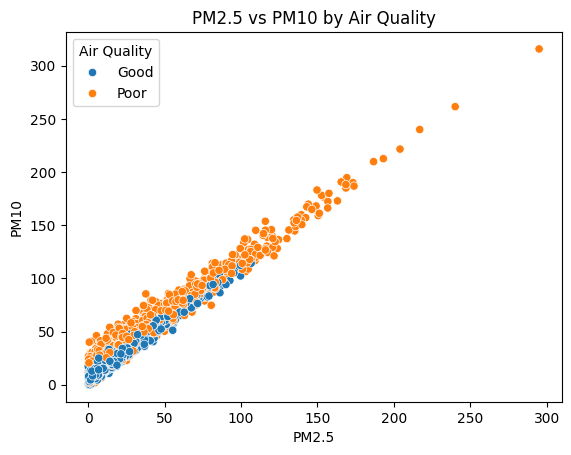

In [13]:
#Scatter Plots
sns.scatterplot(data=dataframe_copy, x='PM2.5', y='PM10', hue='Air Quality')
plt.title('PM2.5 vs PM10 by Air Quality')
plt.show()

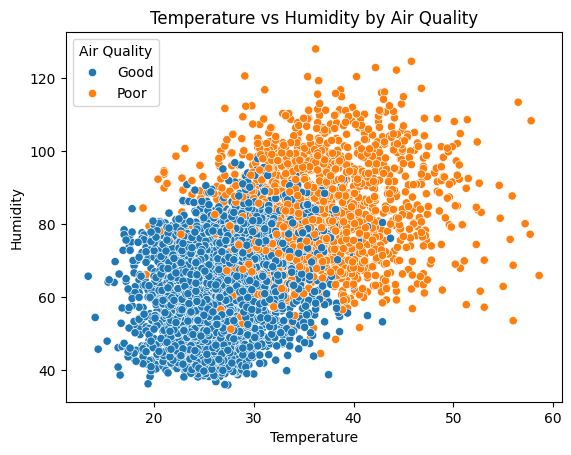

In [14]:
sns.scatterplot(data=dataframe_copy, x='Temperature', y='Humidity', hue='Air Quality')
plt.title('Temperature vs Humidity by Air Quality')
plt.show()

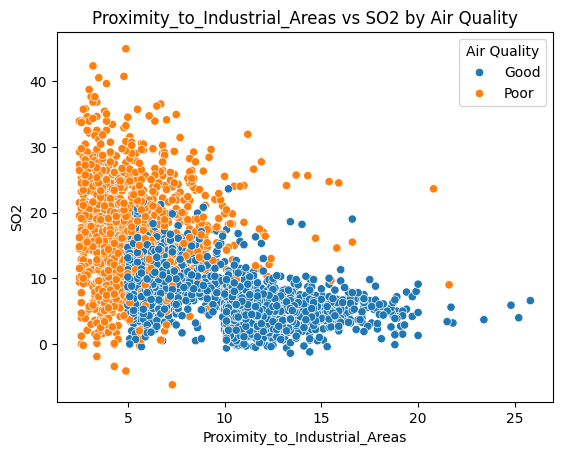

In [15]:
sns.scatterplot(data=dataframe_copy, x='Proximity_to_Industrial_Areas', y='SO2', hue='Air Quality')
plt.title('Proximity_to_Industrial_Areas vs SO2 by Air Quality')
plt.show()

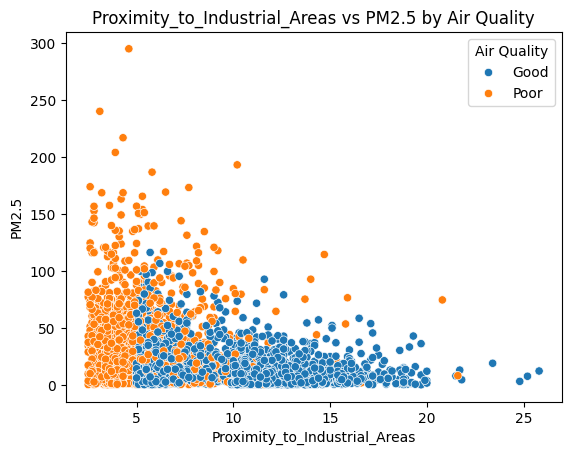

In [16]:
sns.scatterplot(data=dataframe_copy, x='Proximity_to_Industrial_Areas', y='PM2.5', hue='Air Quality')
plt.title('Proximity_to_Industrial_Areas vs PM2.5 by Air Quality')
plt.show()

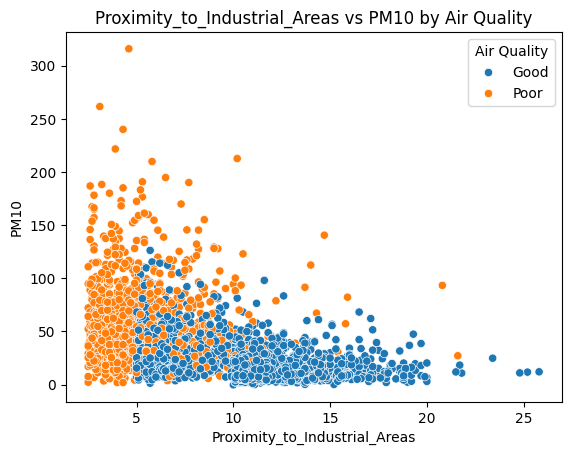

In [17]:
sns.scatterplot(data=dataframe_copy, x='Proximity_to_Industrial_Areas', y='PM10', hue='Air Quality')
plt.title('Proximity_to_Industrial_Areas vs PM10 by Air Quality')
plt.show()

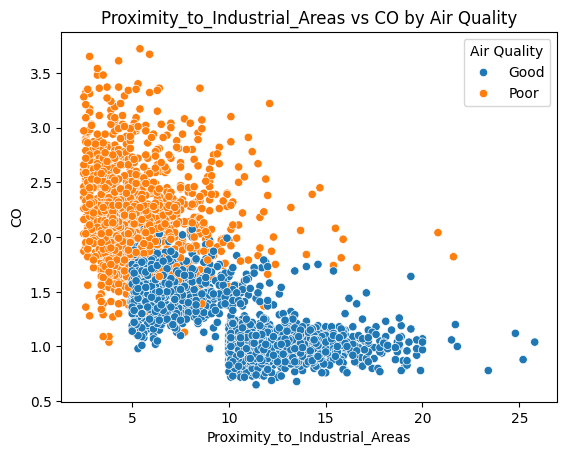

In [18]:
sns.scatterplot(data=dataframe_copy, x='Proximity_to_Industrial_Areas', y='CO', hue='Air Quality')
plt.title('Proximity_to_Industrial_Areas vs CO by Air Quality')
plt.show()

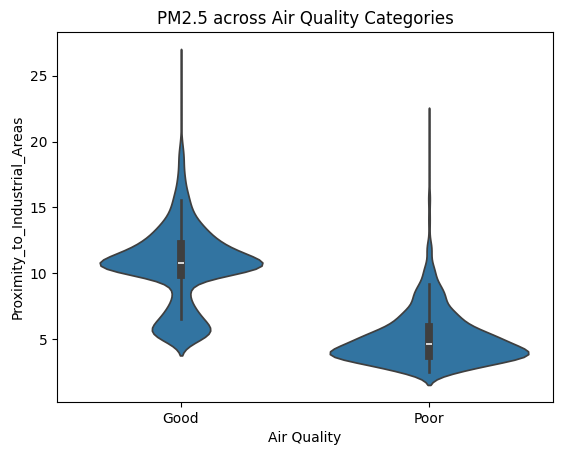

In [19]:
sns.violinplot(data=dataframe_copy, x='Air Quality',y='Proximity_to_Industrial_Areas')
plt.title('PM2.5 across Air Quality Categories')
plt.show()

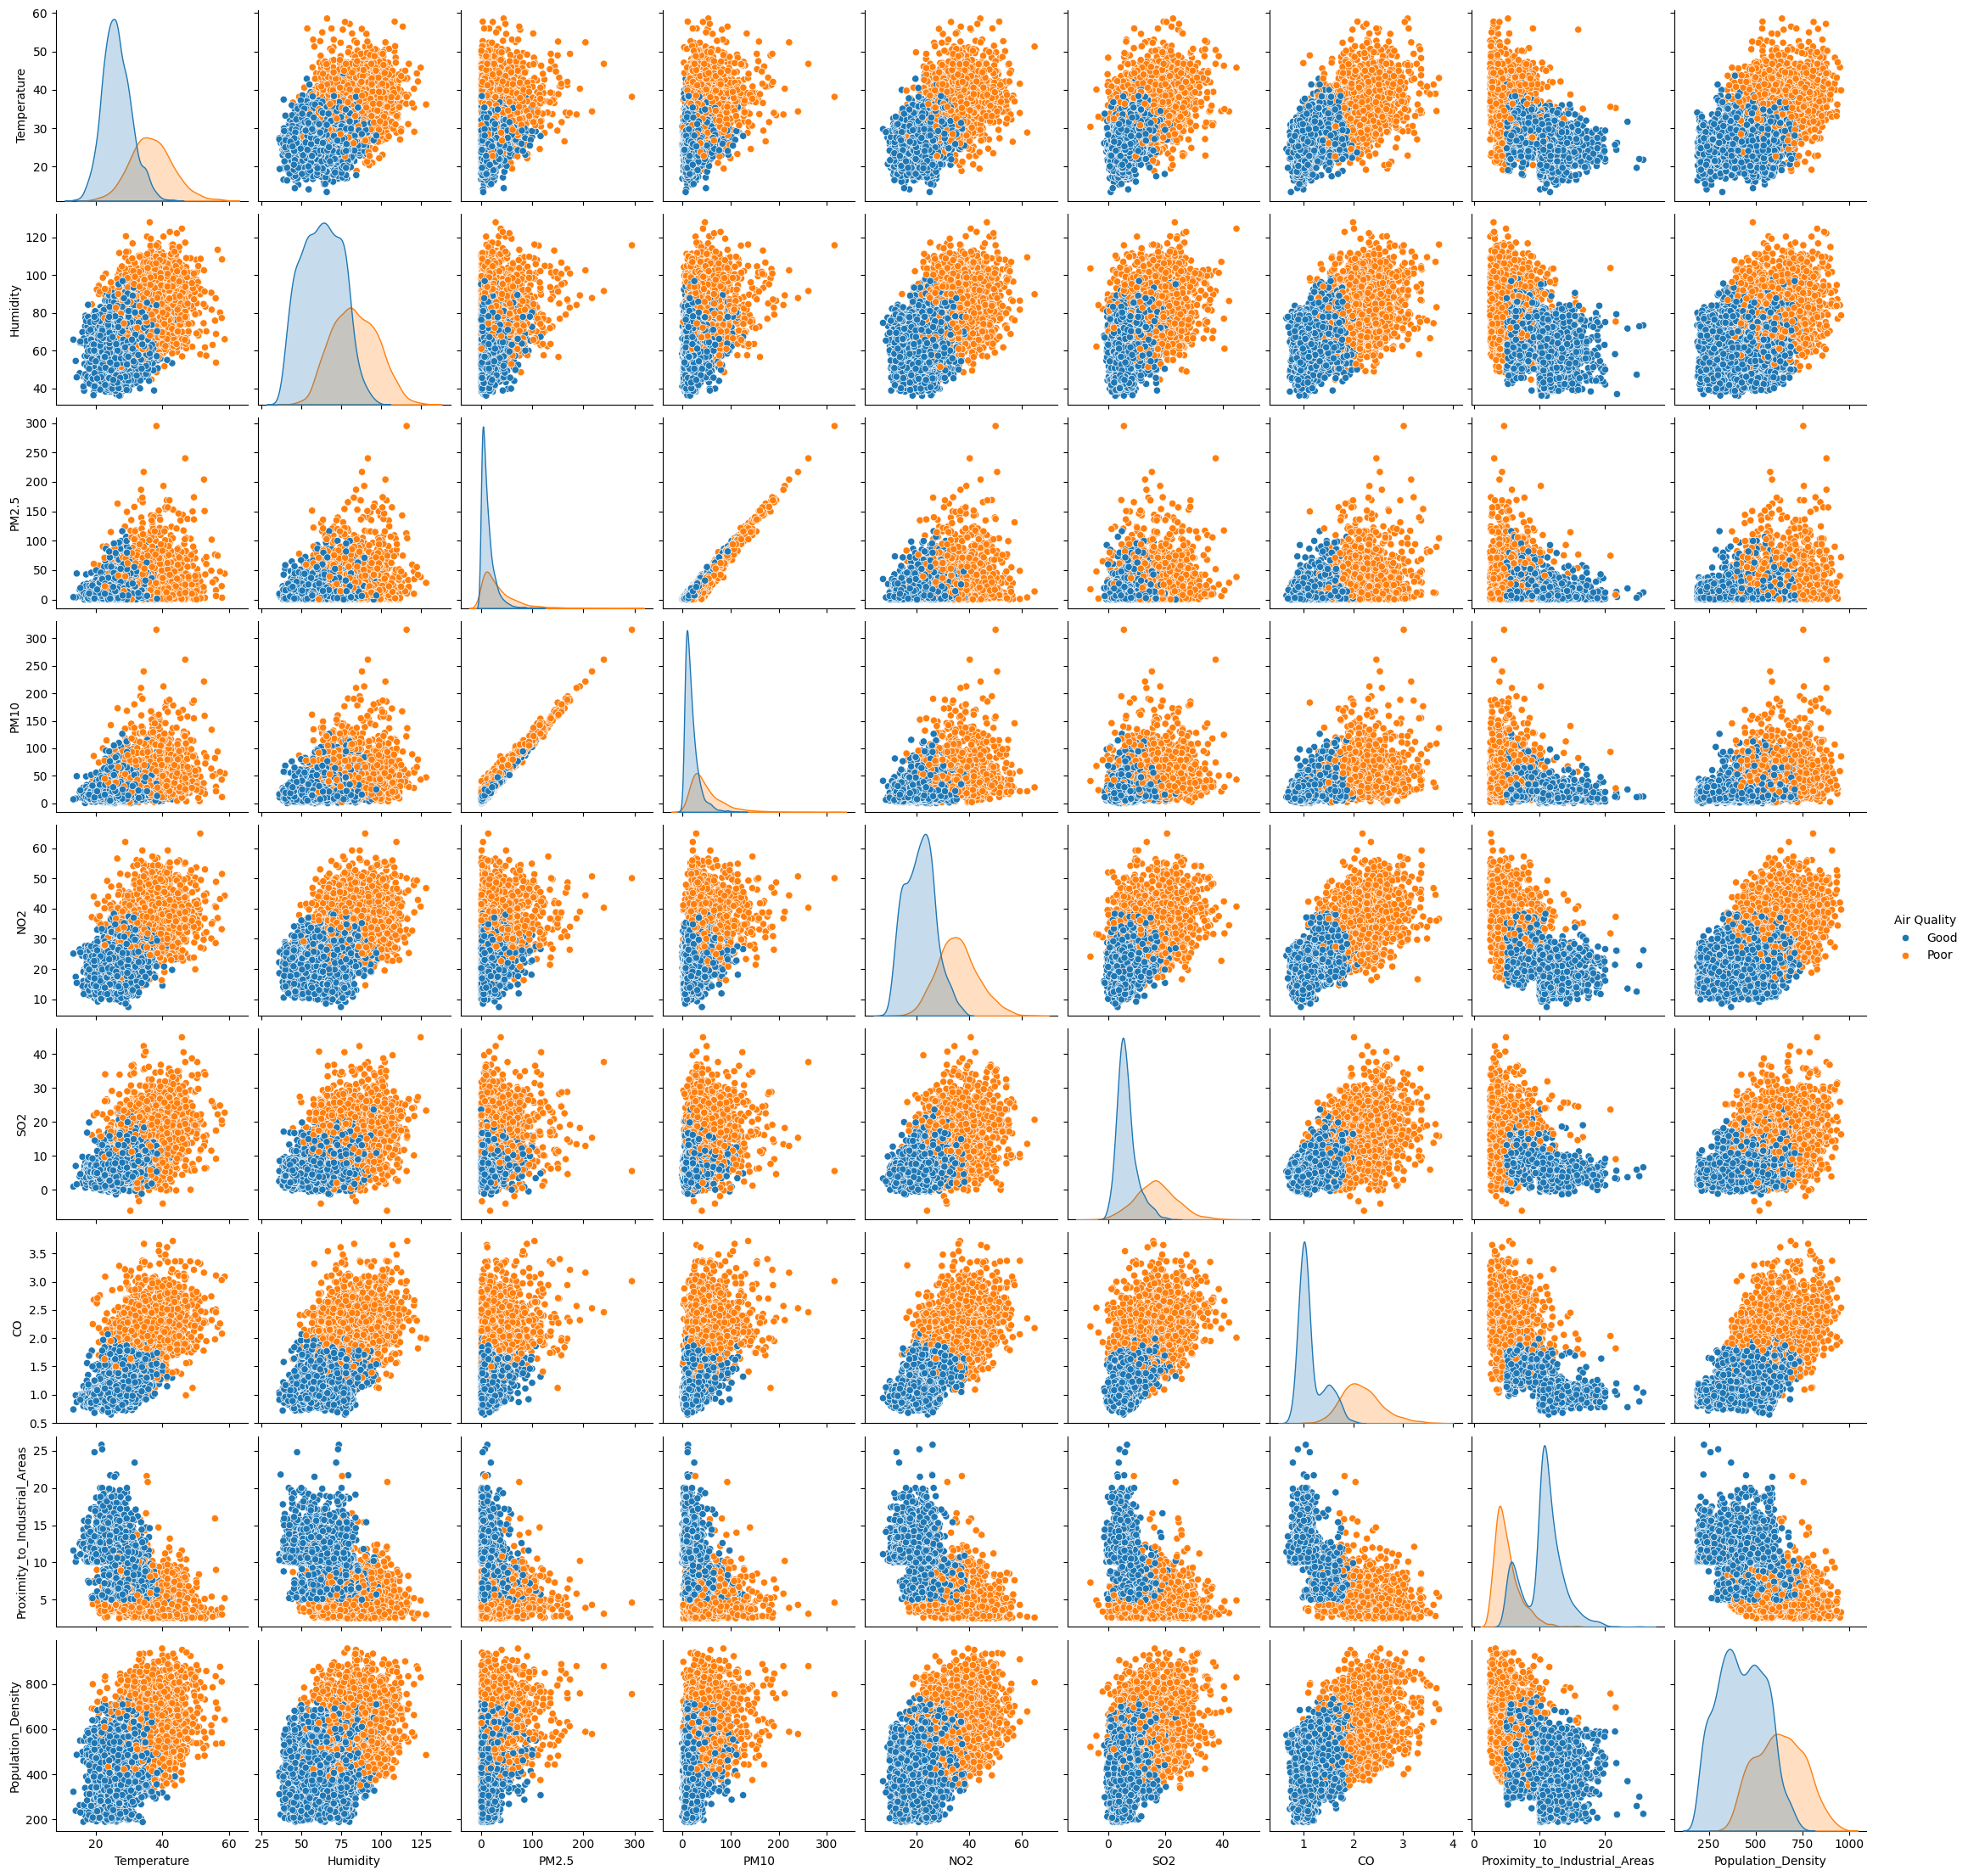

In [20]:
sns.pairplot(dataframe_copy, hue='Air Quality')
plt.show()

Observations:
As seen from the correlation matrix, PM2.5, PM10 have very high positive correlation.
"Proximity to industrial areas" has negative correlation with all other pollutant features, as well as other environmental features.
CO has higher correlation value comparatively ~ 0.7 

PM2.5, PM10 exhibit high positive correlation, and somewhat clear distinction between the 2 classes "good" and "poor" can be observed

Fair distinction can be observed from most if the plots, where samples belonging to "poor" air quality occupy higher range values in all the features except "proximity to industries" and vice versa.

However, some overlap between both the classes in few features "temperature vs humidity", between the pollutants, etc, imply that several factors together determine air quality, no one feature stands out in solely dterimining the air quality.

Steps Ahead:
Consider dropping one of PM10 or PM2.5, or combine them
Consider log transformations of highly skewed features, or other tranformations or clip extreme outliers


### Handling Outliers


In [21]:
dataframe_copy = df.copy()

In [22]:
from scipy.stats import zscore
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']: #'PM2.5', 'PM10', 'SO2'

    print(f"{column} percentile values: ", dataframe_copy[column].quantile([0.001, 0.01, 0.05, 0.9, 0.95, 0.99,0.999, 0.9999]))
    min_thresh, max_thresh = dataframe_copy[column].quantile([0.005,0.995])
    print(f"Min threshold : {min_thresh} and Max threshold : {max_thresh}")

    if column in ['PM10', 'SO2', 'PM2.5']:
        dataframe_copy = dataframe_copy[(dataframe_copy[column] >= min_thresh)]

    dataframe_copy = dataframe_copy[(dataframe_copy[column] <= max_thresh)]   

Temperature percentile values:  0.0010    15.42490
0.0100    18.00000
0.0500    20.70000
0.9000    40.10000
0.9500    43.35500
0.9900    49.60000
0.9990    56.37550
0.9999    58.26008
Name: Temperature, dtype: float64
Min threshold : 17.249 and Max threshold : 51.47550000000001
Humidity percentile values:  0.0010     38.20000
0.0100     40.00000
0.0500     44.50000
0.9000     92.40000
0.9500     99.10000
0.9900    109.77300
0.9990    120.65460
0.9999    126.66282
Name: Humidity, dtype: float64
Min threshold : 39.1 and Max threshold : 112.48649999999998
PM2.5 percentile values:  0.0010      0.0000
0.0100      0.1050
0.0500      0.8000
0.9000     48.2500
0.9500     68.4750
0.9900    117.7800
0.9990    173.7565
0.9999    230.3444
Name: PM2.5, dtype: float64
Min threshold : 0.1 and Max threshold : 142.23750000000092
PM10 percentile values:  0.0010      1.0495
0.0100      3.5650
0.0500      5.7000
0.9000     62.2500
0.9500     82.5500
0.9900    122.2700
0.9990    154.3680
0.9999    158.9837

In [23]:
print(dataframe_copy.shape)
dataframe_copy.describe()

(4040, 10)


Temperature     Humidity        PM2.5         PM10          NO2  \
count  4040.000000  4040.000000  4040.000000  4040.000000  4040.000000   
mean     29.653614    69.216757    18.286411    28.126139    25.900916   
std       6.722923    15.864548    20.260521    23.297102     8.975592   
min      13.400000    36.000000     0.100000     2.600000     7.400000   
25%      24.600000    57.300000     4.500000    11.600000    19.275000   
50%      28.400000    69.000000    11.200000    20.700000    24.600000   
75%      34.000000    79.400000    24.300000    36.200000    31.900000   
max      51.400000   112.400000   124.500000   136.400000    54.100000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  4040.000000  4040.000000                    4040.000000   
mean      9.681163     1.465072                       8.809827   
std       6.635946     0.549773                       3.730546   
min      -0.100000     0.650000                       2.500000   
25%       4.800000     1.010000                       5.400000   
50%       7.300000     1.260000                      10.000000   
75%      13.600000     1.870000                      11.300000   
max      33.900000     3.150000                      25.800000   

       Population_Density  
count         4040.000000  
mean           490.988366  
std            155.917020  
min            188.000000  
25%            372.000000  
50%            488.000000  
75%            594.000000  
max            957.000000

I have dropped the outliers with the criteria that
 
For feature in ['temperature', 'humidity','pm2.5','pm10','no2','so2','co']
If feature in pm10, so2, -> retain records where df[feature] >= df[feature]. quantile(0.001 )
 
Retain records where df[feature]<= df[feature]. quantile(0.995)
 
After this 160 records have been dropped.
 
My rationale behind this approach -> so2, pm10 have negative values which are removed to some extent (so > -1.2 is retained as opposed to the earlier -6.2) and since most of the features except "proximity, population density"(least outliers) have extreme values towards the right, the max threshold helps dropping them .

Reson for not preferring capping: might introduce bias in the data as the size of the data is very less

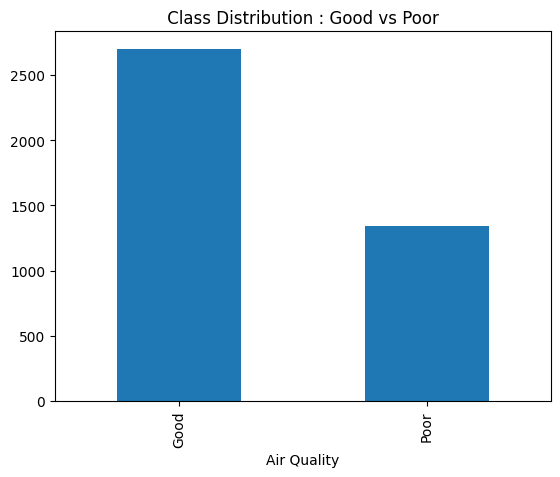

In [24]:
#Target Value Distribution

dataframe_copy['Air Quality'].value_counts().plot(kind='bar')
plt.title(f' Class Distribution : Good vs Poor ')
plt.show()

### FEature Engineering

In [25]:
dataframe_copy['PM_combined'] = (df['PM2.5'] + df['PM10'])/2
dataframe_copy = dataframe_copy.drop(columns=['PM2.5','PM10'])

Since PM2.5, PM10 have high correlation, these features might be redundant, so can be either combined or tranformed using PCA or dropped retaining only one of them.

In [26]:
dataframe_copy.columns

Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'PM_combined'],
      dtype='object')

In [27]:
numerical_features.remove('PM2.5')
numerical_features.remove('PM10')
numerical_features.append('PM_combined')

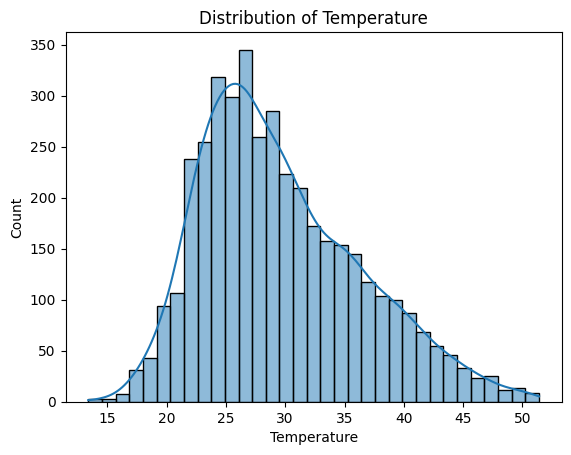

Skewness: 0.6587444893493076


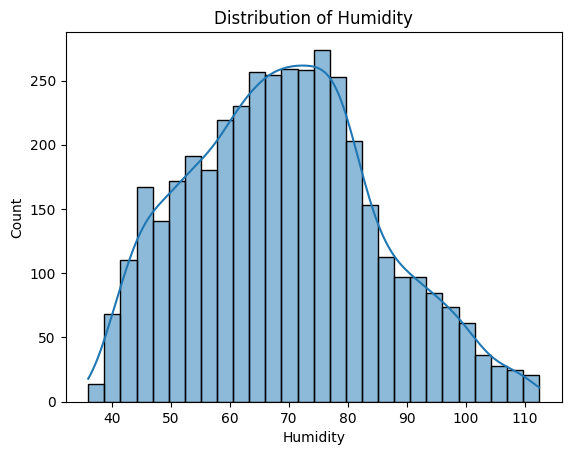

Skewness: 0.2470975523588909


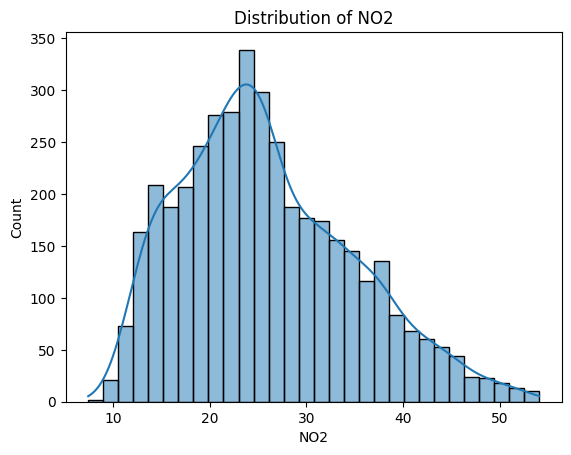

Skewness: 0.5632660681529021


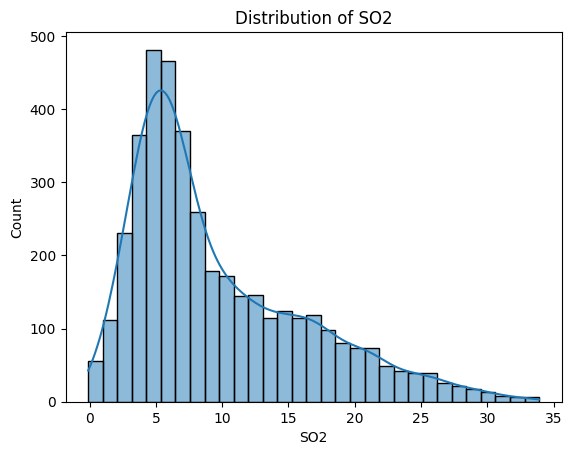

Skewness: 1.0892062266416422


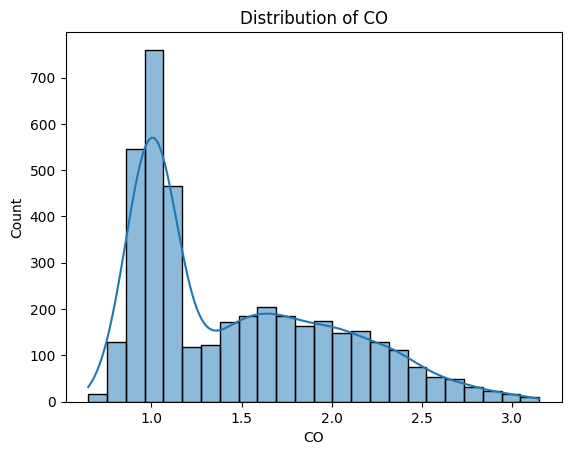

Skewness: 0.7727855774335256


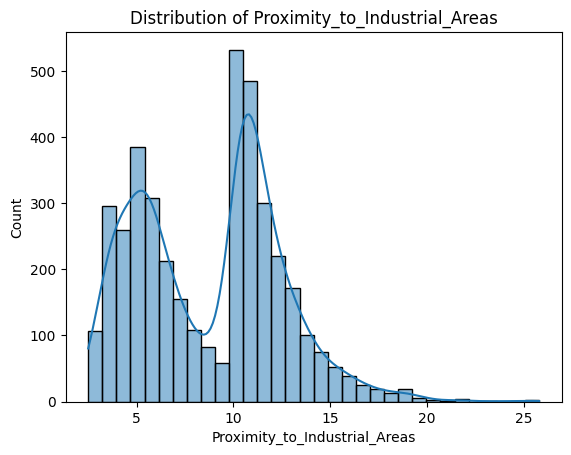

Skewness: 0.2847731627252066


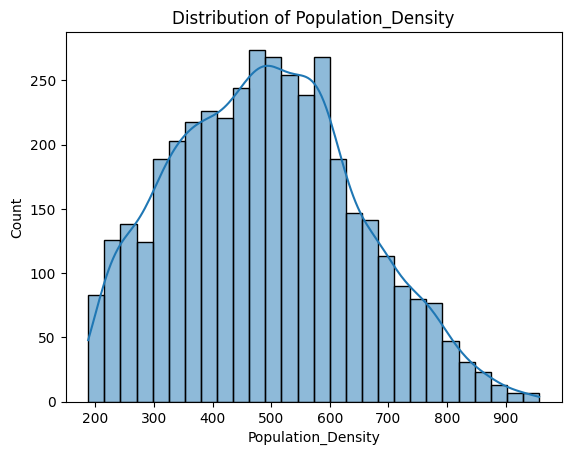

Skewness: 0.2278992759627906


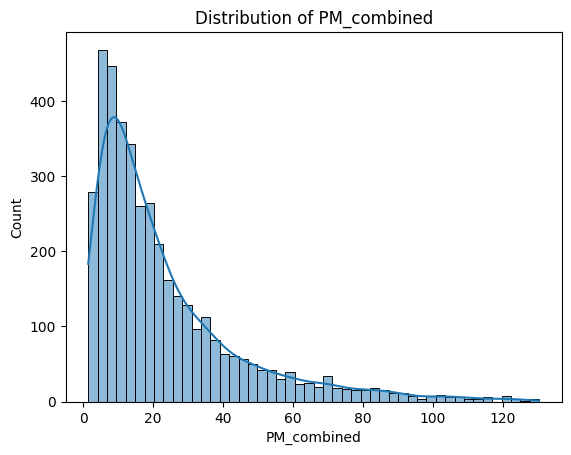

Skewness: 1.89200859203954


In [28]:
for feature in numerical_features:
    plt.figure()
    sns.histplot(data=dataframe_copy, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

    skew_value = dataframe_copy[feature].skew()
    print(f"Skewness: {skew_value}")


Since PM_combined, SO2 still have high skewness, perform log transformation

In [29]:
dataframe_copy['PM_combined_log'] = np.log1p(dataframe_copy['PM_combined'])
dataframe_copy['SO2_log'] = np.log1p(dataframe_copy['SO2'])

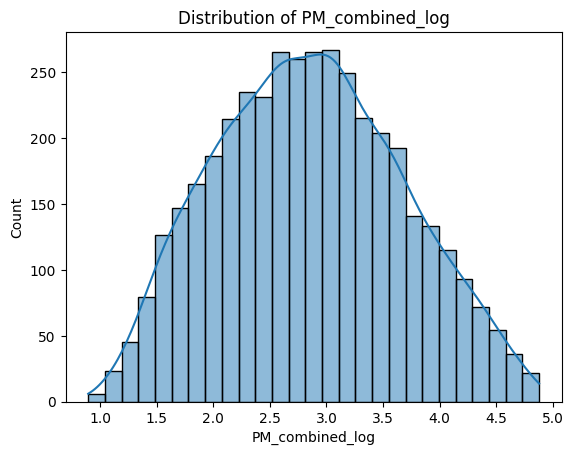

Skewness: 0.12786046978979937


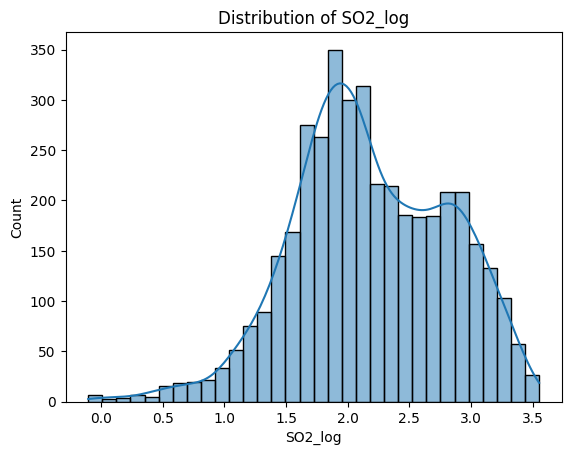

Skewness: -0.17173847304371798


In [30]:
for feature in ['PM_combined_log','SO2_log']:
    plt.figure()
    sns.histplot(data=dataframe_copy, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

    skew_value = dataframe_copy[feature].skew()
    print(f"Skewness: {skew_value}")


Performing log transform has reduced the skewness of the features. Recheck for outliers, before proceeding with feature scaling.

In [31]:
print(numerical_features)
print(dataframe_copy.columns)
df_cleaned = dataframe_copy.copy()
df_cleaned.drop(columns = ['SO2','PM_combined','Air Quality'], inplace=True) #['SO2','PM_combined','Air Quality']

['Temperature', 'Humidity', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'PM_combined']
Index(['Temperature', 'Humidity', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality',
       'PM_combined', 'PM_combined_log', 'SO2_log'],
      dtype='object')


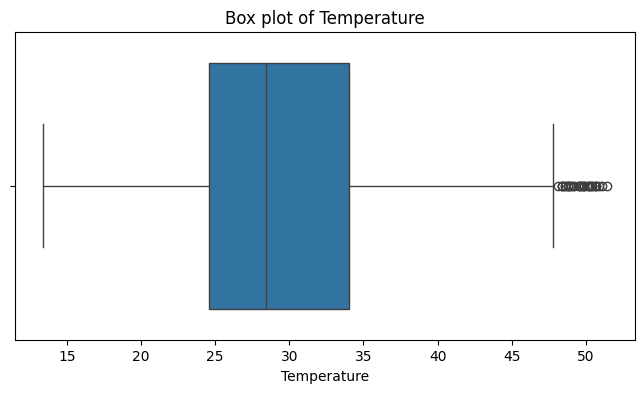

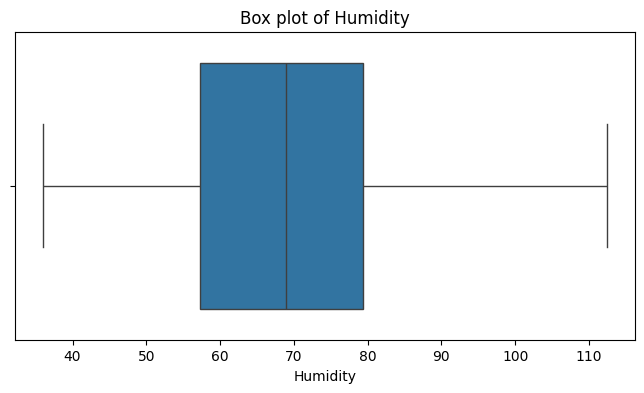

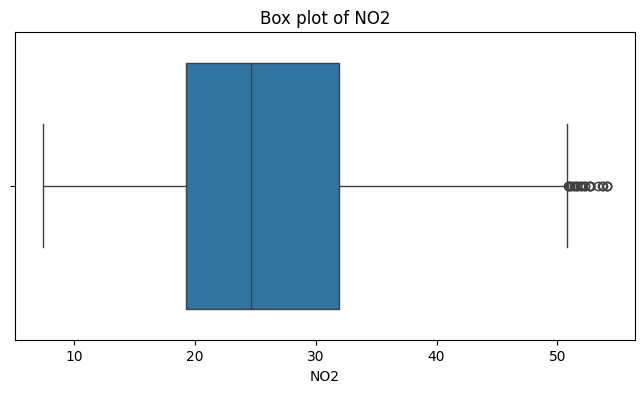

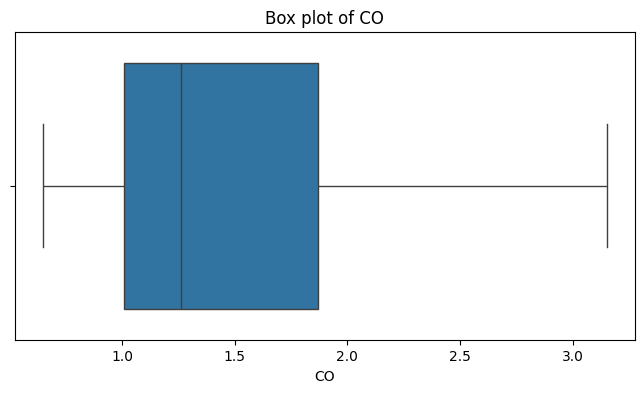

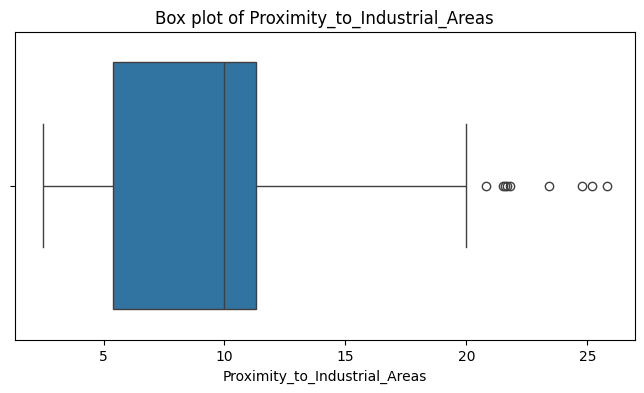

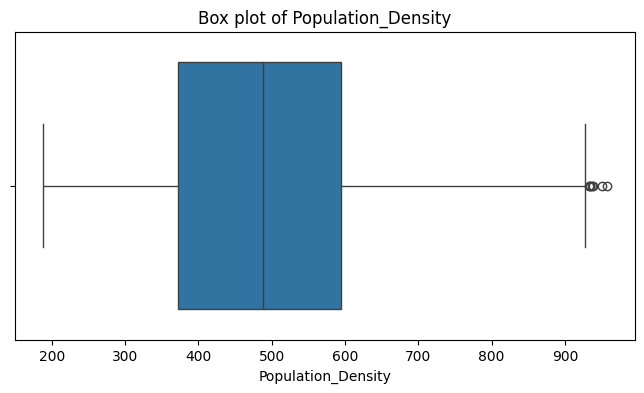

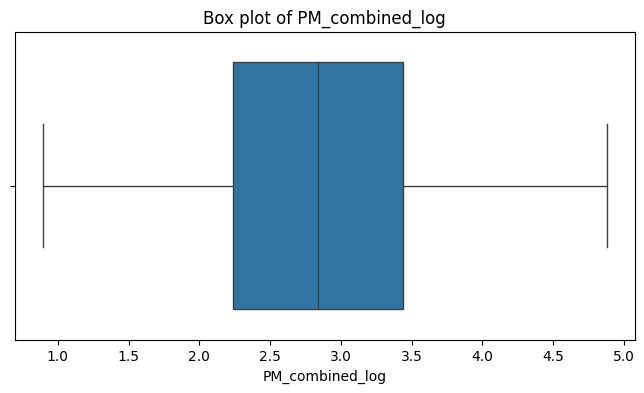

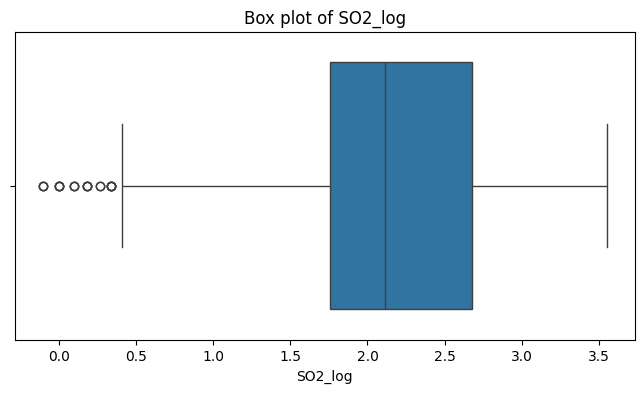

In [32]:
for feature in list(df_cleaned.columns):
    plt.figure(figsize=(8,4)) #width, height
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

<Axes: >

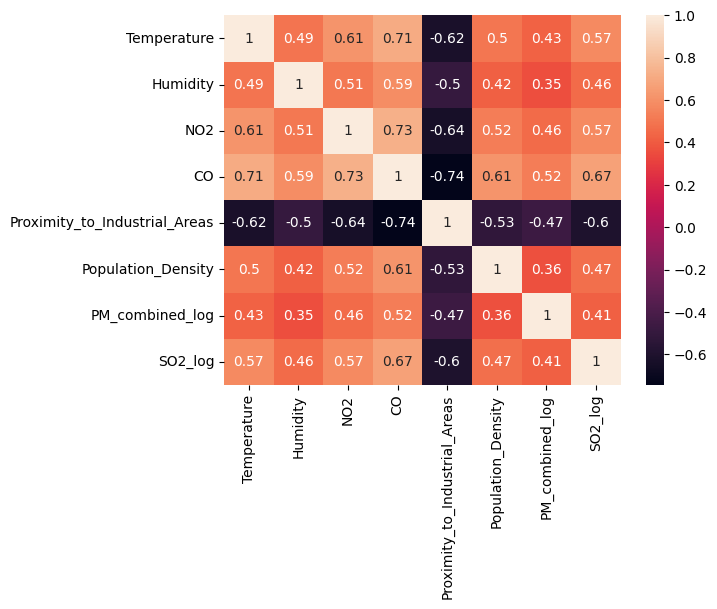

In [33]:
sns.heatmap(df_cleaned.corr(), annot=True)

The number of outliers has also reduced noticeably. Above shows the correlation matrix for the updated dataset, the correlation of PM_combined has improved the correlation to some extent.

Encoding Categorical Variables:

In [34]:
df_air_quality = pd.get_dummies(dataframe_copy['Air Quality'], drop_first=True, dtype=int)
dataframe_copy = pd.concat([dataframe_copy, df_air_quality], axis=1)
dataframe_copy.head(10)

Temperature  Humidity   NO2   SO2    CO  Proximity_to_Industrial_Areas  \
0         27.1      39.1  13.5   5.3  1.15                           11.1   
1         26.5      70.7  21.9   5.6  1.01                           12.7   
2         39.4      96.6  42.9  17.9  1.82                            3.1   
3         41.7      82.5  31.1  12.7  1.80                            4.6   
4         29.4      93.8  45.1  11.8  2.03                            5.4   
5         33.2      80.5  32.0  15.3  1.69                            4.9   
6         26.3      65.7  18.3   5.9  0.85                           13.0   
7         20.0      53.3  26.1   6.6  1.09                           10.2   
8         28.6      53.7  23.2   4.5  1.02                           11.0   
9         22.3      80.5  17.2   6.3  1.18                           10.4   

   Population_Density Air Quality  PM_combined  PM_combined_log   SO2_log  \
0                 551        Good         6.20         1.974081  1.840550   
1                 303        Good        11.45         2.521721  1.887070   
2                 674        Poor        25.05         3.260018  2.939162   
3                 735        Poor         8.75         2.277267  2.617396   
4                 486        Poor        16.50         2.862201  2.549445   
5                 535        Poor        17.75         2.931194  2.791165   
6                 529        Good         3.40         1.481605  1.931521   
7                 538        Good         8.30         2.230014  2.028148   
8                 508        Good        31.45         3.479700  1.704748   
9                 232        Good         8.25         2.224624  1.987874   

   Poor  
0     0  
1     0  
2     1  
3     1  
4     1  
5     1  
6     0  
7     0  
8     0  
9     0

In [35]:
dataframe_copy[dataframe_copy['SO2'] < 0.5]

Temperature  Humidity   NO2  SO2    CO  Proximity_to_Industrial_Areas  \
243          19.4      70.6  21.1  0.4  0.99                           10.2   
466          48.4      89.1  52.0  0.0  2.59                            2.6   
520          25.7      57.0  19.2  0.1  1.00                           10.8   
718          29.6      73.6  26.0  0.2  1.12                           11.9   
1038         36.0      89.8  26.0 -0.1  1.74                            4.3   
1055         26.6      49.0  15.1  0.3  0.79                           11.8   
1095         26.5      45.3  13.1  0.4  0.99                           11.0   
1112         22.9      63.8  16.7  0.4  0.98                           10.7   
1132         21.3      70.4  25.4  0.4  0.84                           10.9   
1143         24.2      62.7  22.3  0.3  0.99                           10.3   
1221         24.4      66.9  22.3  0.0  1.14                           10.6   
1303         21.6      45.0  15.1  0.4  1.10                           10.3   
1416         21.5      61.4  22.1 -0.1  0.95                           10.9   
1429         25.2      46.0  22.8  0.2  1.17                           10.4   
1495         42.1      83.5  42.8  0.1  2.31                            3.4   
1952         25.3      61.9  11.2  0.2  0.99                           13.4   
2623         25.6      73.6  23.1 -0.1  1.08                           18.8   
3204         25.8      51.5  17.5  0.2  1.26                           11.8   
3427         28.5      58.9  10.1  0.0  1.00                           11.0   
3482         39.5      70.2  38.0  0.1  1.85                            4.3   
4162         28.3      63.1  20.7  0.0  1.22                            5.1   

      Population_Density Air Quality  PM_combined  PM_combined_log   SO2_log  \
243                  262        Good        11.20         2.501436  0.336472   
466                  664        Poor        23.70         3.206803  0.000000   
520                  323        Good        18.70         2.980619  0.095310   
718                  490        Good         5.20         1.824549  0.182322   
1038                 490        Poor        40.45         3.724488 -0.105361   
1055                 337        Good        10.75         2.463853  0.262364   
1095                 224        Good        12.20         2.580217  0.336472   
1112                 593        Good         6.15         1.967112  0.336472   
1132                 486        Good        14.25         2.724580  0.336472   
1143                 555        Good         6.50         2.014903  0.262364   
1221                 230        Good         7.20         2.104134  0.000000   
1303                 487        Good        16.25         2.847812  0.336472   
1416                 447        Good         7.30         2.116256 -0.105361   
1429                 392        Good         6.05         1.953028  0.182322   
1495                 797        Poor        25.45         3.275256  0.095310   
1952                 542        Good        25.15         3.263849  0.182322   
2623                 547        Good         7.10         2.091864 -0.105361   
3204                 452        Good        11.05         2.489065  0.182322   
3427                 536        Good         5.35         1.848455  0.000000   
3482                 616        Poor        14.85         2.763170  0.095310   
4162                 399        Good        64.10         4.175925  0.000000   

      Poor  
243      0  
466      1  
520      0  
718      0  
1038     1  
1055     0  
1095     0  
1112     0  
1132     0  
1143     0  
1221     0  
1303     0  
1416     0  
1429     0  
1495     1  
1952     0  
2623     0  
3204     0  
3427     0  
3482     1  
4162     0

In [36]:
dataframe_copy.isnull().sum()

Temperature                      0
Humidity                         0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
PM_combined                      0
PM_combined_log                  0
SO2_log                          0
Poor                             0
dtype: int64

### Feature Selection

ANOVA method

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(df_cleaned,dataframe_copy['Air Quality']) # X,y


feature_scores = pd.DataFrame({'FEature':df_cleaned.columns,
                               'Score':selector.scores_})

print(feature_scores.sort_values(by='Score', ascending=False))





                         FEature        Score
3                             CO  9370.238557
2                            NO2  4325.877707
0                    Temperature  3630.816976
4  Proximity_to_Industrial_Areas  3437.409316
7                        SO2_log  2824.072945
5             Population_Density  2183.170259
1                       Humidity  2097.451987
6                PM_combined_log  1251.467473


Feature Importance assessment using tree based classifiers

Feature importances from ExtraTreesClassifier Forest:
Temperature                      0.423254
SO2_log                          0.206880
CO                               0.145230
Proximity_to_Industrial_Areas    0.067379
NO2                              0.056381
Humidity                         0.056204
Population_Density               0.023946
PM_combined_log                  0.020727
dtype: float64


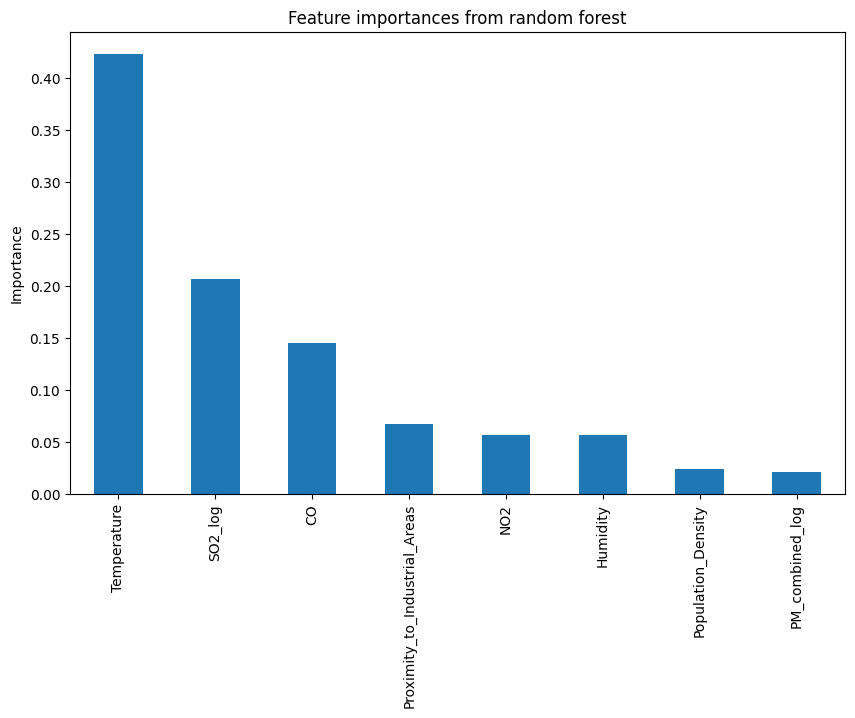

In [38]:
extraTreeClassifier = ExtraTreeClassifier(random_state=42)
extraTreeClassifier.fit(df_cleaned,dataframe_copy['Air Quality'])

feature_importances = pd.Series(extraTreeClassifier.feature_importances_, 
                                index=df_cleaned.columns).sort_values(ascending=False)
print("Feature importances from ExtraTreesClassifier Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from random forest')
plt.ylabel('Importance')
plt.show()

Random Forest

Feature importances from Random Forest:
CO                               0.316394
NO2                              0.209197
Proximity_to_Industrial_Areas    0.142220
SO2_log                          0.128277
Temperature                      0.085852
Population_Density               0.059083
Humidity                         0.043738
PM_combined_log                  0.015240
dtype: float64


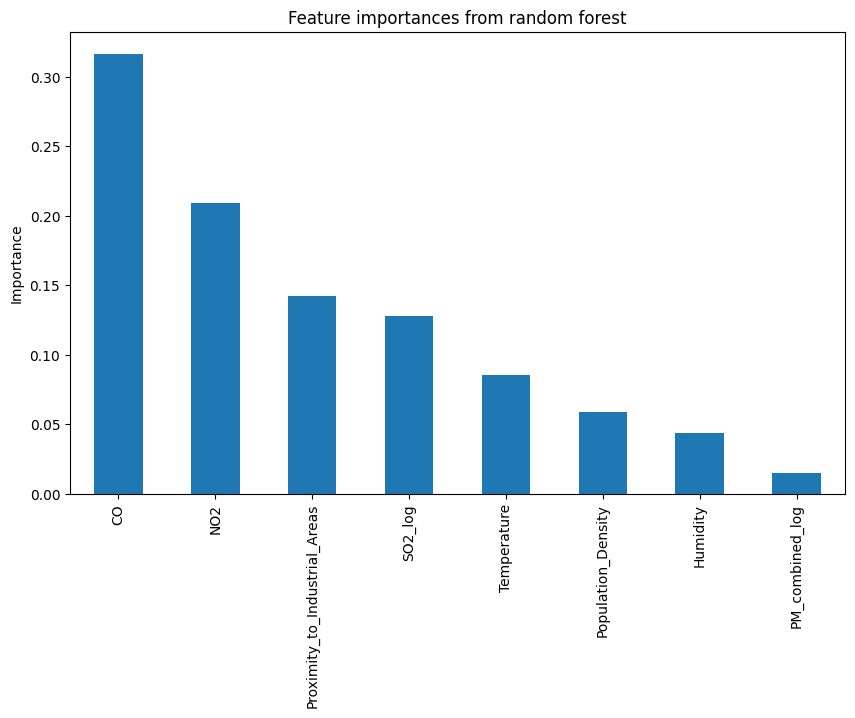

In [39]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(df_cleaned,dataframe_copy['Air Quality'])

feature_importances = pd.Series(clf_rf.feature_importances_, 
                                index=df_cleaned.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from random forest')
plt.ylabel('Importance')
plt.show()


Gradient Boosting

Feature importances from Gradient Boosting:
CO                               0.768985
Proximity_to_Industrial_Areas    0.095945
NO2                              0.050438
SO2_log                          0.028486
Temperature                      0.022645
Humidity                         0.020184
Population_Density               0.011158
PM_combined_log                  0.002159
dtype: float64


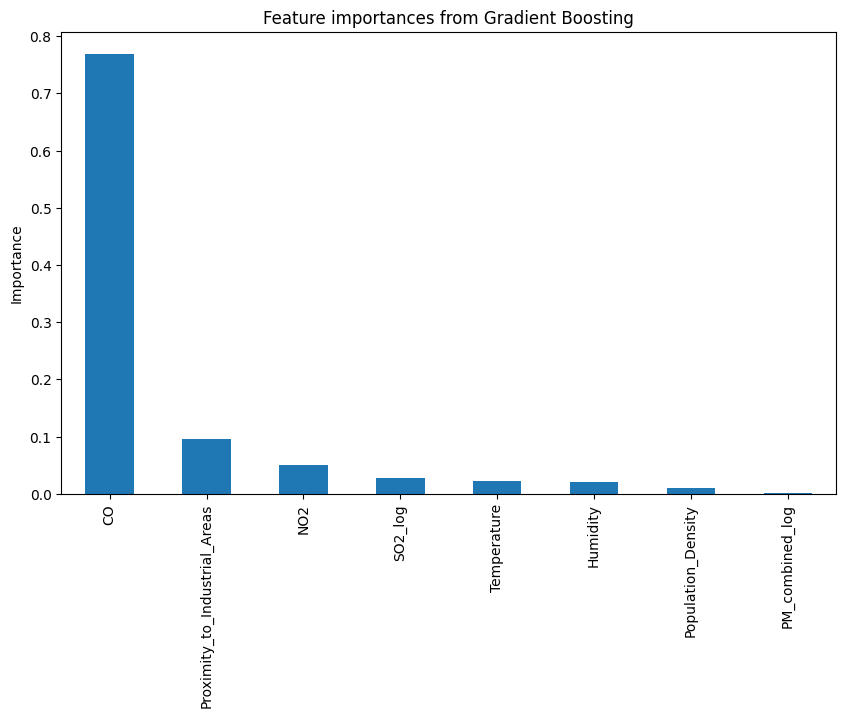

In [40]:
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(df_cleaned,dataframe_copy['Air Quality'])

feature_importances = pd.Series(clf_gb.feature_importances_, 
                                index=df_cleaned.columns).sort_values(ascending=False)
print("Feature importances from Gradient Boosting:")
print(feature_importances)

plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature importances from Gradient Boosting')
plt.ylabel('Importance')
plt.show()


We can observe that CO, NO2, Proximity_to Industrial_areas, SO2_log, Temperature remain the top five features contributing to the quality of air.
Therefore we can choose to discard or retain the remaining features : population density, PM, Humidity.

### Data preparation for model training

In [41]:
df_cleaned.columns

Index(['Temperature', 'Humidity', 'NO2', 'CO', 'Proximity_to_Industrial_Areas',
       'Population_Density', 'PM_combined_log', 'SO2_log'],
      dtype='object')

In [42]:
X = df_cleaned.drop(columns=['PM_combined_log', 'Humidity', 'Population_Density']).values  #temperature,  no2, co, proximity, so2
y = dataframe_copy['Poor'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling


In [44]:
# #### Experimenting with Robust Scaler

In [45]:
from sklearn.preprocessing import RobustScaler, StandardScaler
#scaler = RobustScaler()
#df_scaled = scaler.fit_transform

#### Standardization

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

#Scaling the training data
X_train = scaler.transform(X_train)

#Scaling the test data
X_test = scaler.transform(X_test)

### Baseline Model Initialization and Evaluation using Cross Validation

In [47]:
#svm, naive bayes classifier, decision tree, random forest, gradient boosting, adaboost, xgboost, knn  #"Naive Bayes":GaussianNB(),
baseline_models = {"Logistic Regression":LogisticRegression(),"SVC":SVC(kernel='linear'),
                   "knn":KNeighborsClassifier(n_neighbors=5),
                   "SVM":SVC(), "Decision Tree": DecisionTreeClassifier(),
                   "Random Forest":RandomForestClassifier(criterion='entropy', random_state=42),
                   "Gradient Boost":GradientBoostingClassifier(random_state=42),
                   "Ada Boost":AdaBoostClassifier()
                }


def model_initializer(model):
    clf = baseline_models[model]
    return clf

In [48]:
#Baseline cross-validation using k-fold crossvalidation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(kfold)

KFold(n_splits=5, random_state=42, shuffle=True)


In [49]:
def plot_roc_curve(y_test, y_pred, model):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    #plot the roc curve
    plt.figure()
    plt.plot(fpr, tpr, label = f'ROC curve (area = {roc_auc}.2f)')
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend('ROC curve for model : {model}')
    plt.legend()
    plt.show()

Baseline Cross Validation accuracy for model - Logistic Regression:0.9632 ± 0.0053
Training accuracy: 0.9628712871287128
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       540
           1       0.94      0.95      0.94       268

    accuracy                           0.96       808
   macro avg       0.96      0.96      0.96       808
weighted avg       0.96      0.96      0.96       808



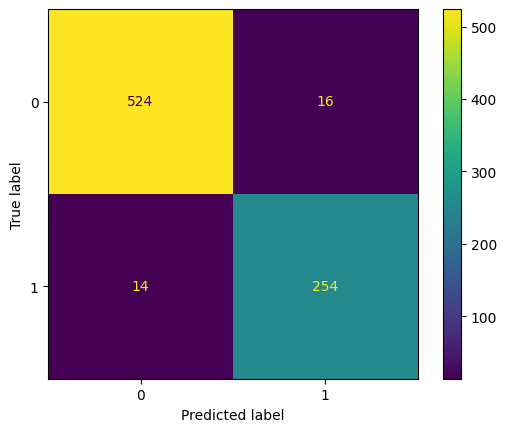

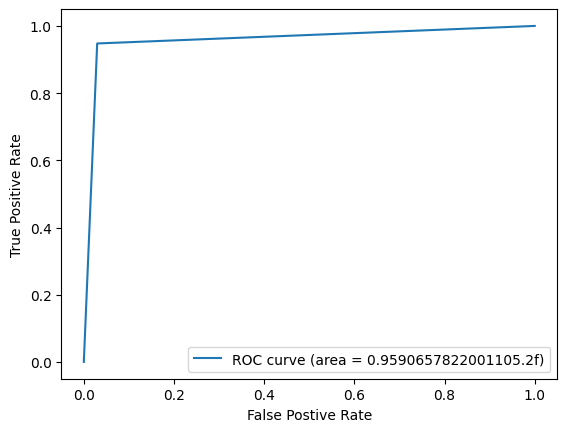

Baseline Cross Validation accuracy for model - SVC:0.9619 ± 0.0049
Training accuracy: 0.9625618811881188
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       540
           1       0.94      0.94      0.94       268

    accuracy                           0.96       808
   macro avg       0.96      0.96      0.96       808
weighted avg       0.96      0.96      0.96       808



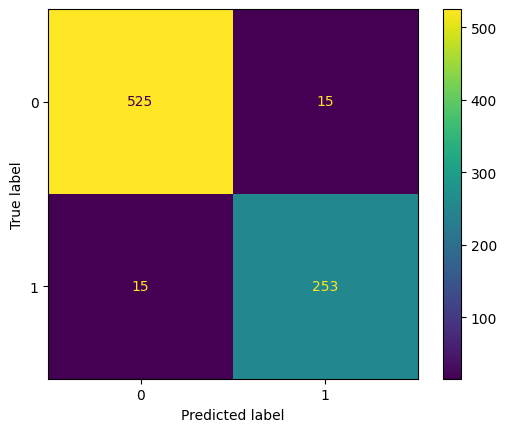

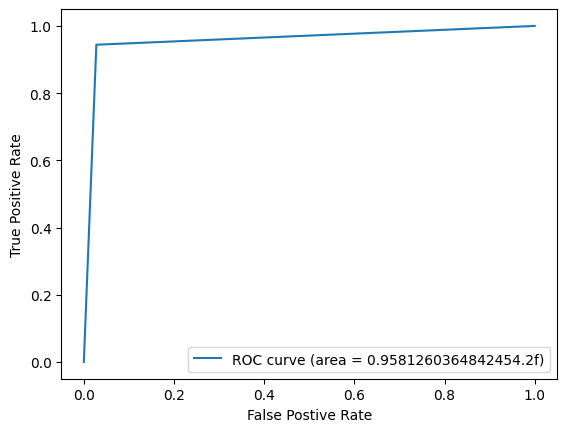

Baseline Cross Validation accuracy for model - knn:0.9635 ± 0.0053
Training accuracy: 0.9749381188118812
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.97      0.96      0.96       268

    accuracy                           0.97       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.97      0.97      0.97       808



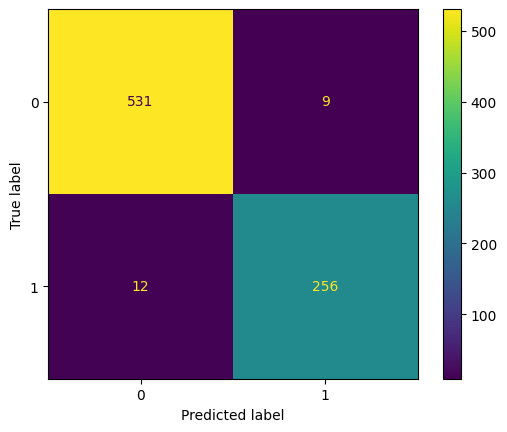

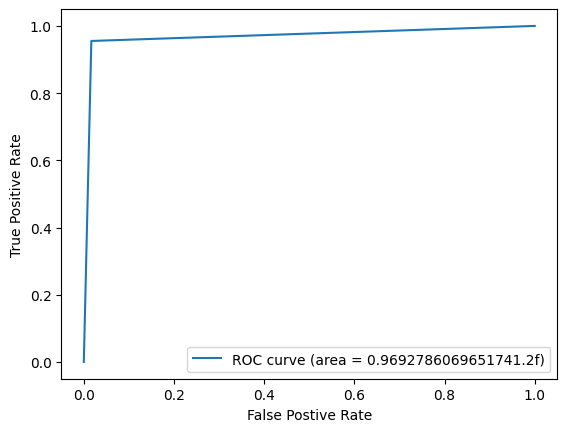

Baseline Cross Validation accuracy for model - SVM:0.9706 ± 0.0040
Training accuracy: 0.9749381188118812
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.97      0.96      0.96       268

    accuracy                           0.98       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.98      0.98      0.98       808



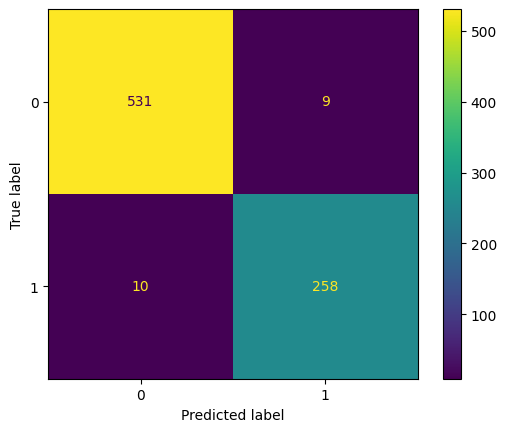

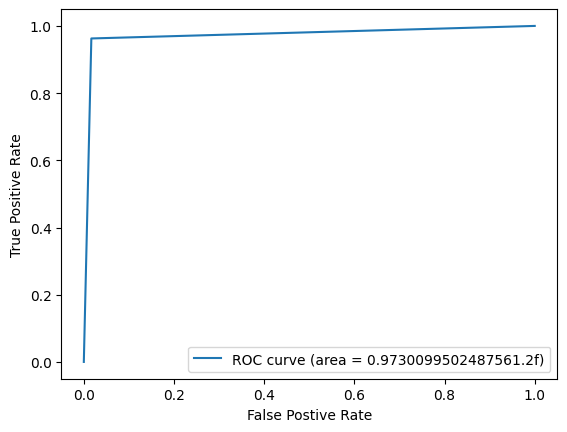

Baseline Cross Validation accuracy for model - Decision Tree:0.9598 ± 0.0093
Training accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       540
           1       0.93      0.93      0.93       268

    accuracy                           0.96       808
   macro avg       0.95      0.95      0.95       808
weighted avg       0.96      0.96      0.96       808



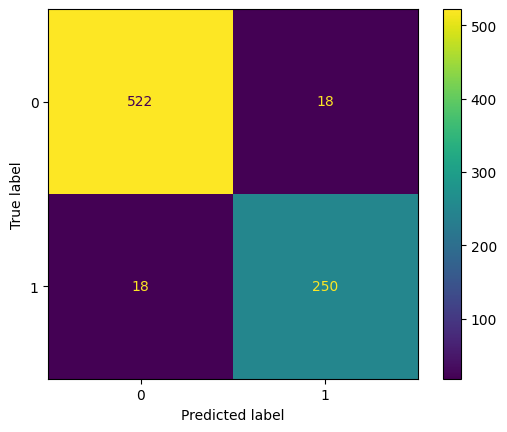

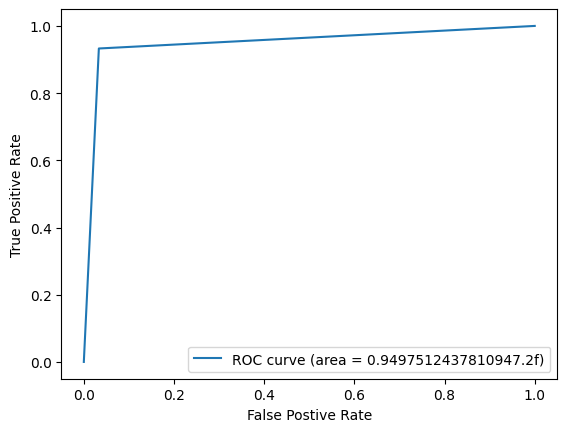

Baseline Cross Validation accuracy for model - Random Forest:0.9743 ± 0.0057
Training accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       540
           1       0.97      0.96      0.96       268

    accuracy                           0.98       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.98      0.98      0.98       808



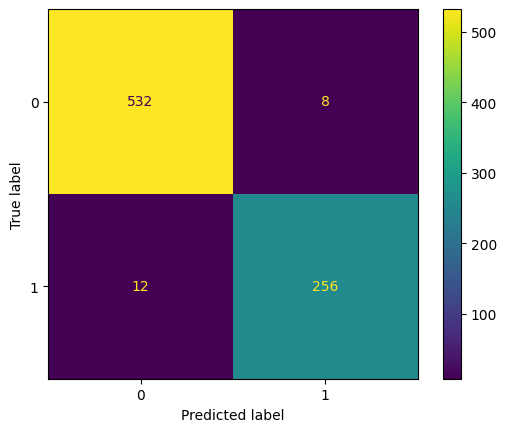

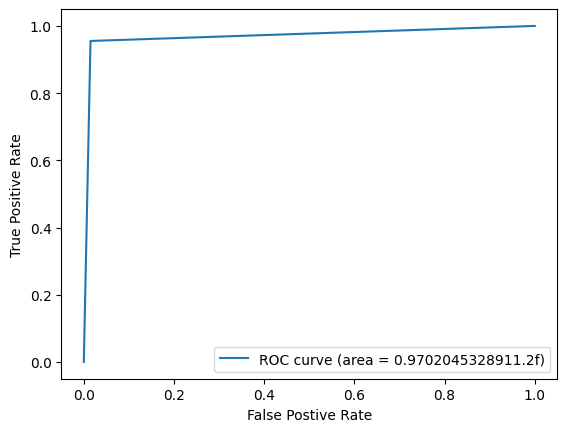

Baseline Cross Validation accuracy for model - Gradient Boost:0.9712 ± 0.0044
Training accuracy: 0.9916460396039604
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.97      0.96      0.96       268

    accuracy                           0.98       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.98      0.98      0.98       808



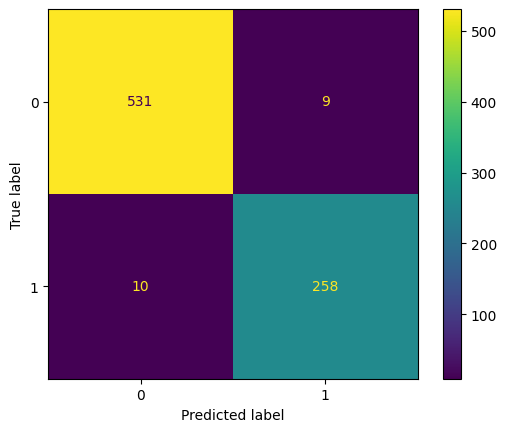

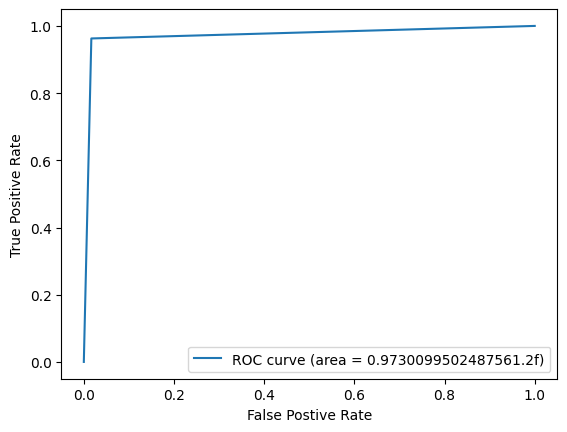

Baseline Cross Validation accuracy for model - Ada Boost:0.9706 ± 0.0038
Training accuracy: 0.9798886138613861
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       540
           1       0.98      0.97      0.97       268

    accuracy                           0.98       808
   macro avg       0.98      0.98      0.98       808
weighted avg       0.98      0.98      0.98       808



c:\Users\338575\new_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


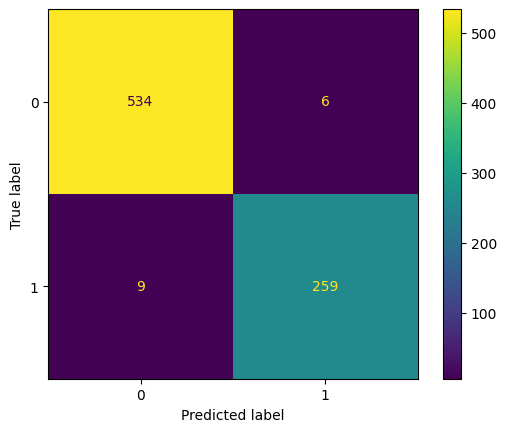

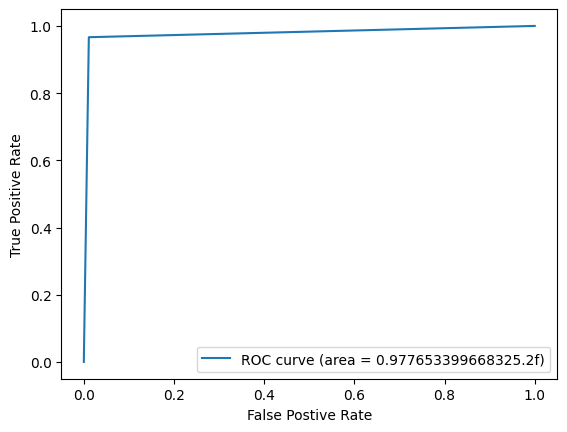

In [50]:
for model in baseline_models.keys():
    baseline_score = cross_val_score(baseline_models[model],
                                     X_train,
                                     y_train, 
                                     cv=kfold, 
                                     scoring='accuracy', 
                                     n_jobs=-1)
    print(f"Baseline Cross Validation accuracy for model - {model}:{baseline_score.mean():.4f} ± {baseline_score.std():.4f}")

    baseline_models[model].fit(X_train, y_train)

    y_train_pred = baseline_models[model].predict(X_train)

    print("Training accuracy:",accuracy_score(y_train,y_train_pred))

    y_pred = baseline_models[model].predict(X_test)

    print("Classification Report:\n",classification_report(y_test,y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=baseline_models[model].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=baseline_models[model].classes_)
    disp.plot()
    plt.show()

    #RocCurveDisplay.from_estimator(baseline_models[model], X_test, y_test)
    #plt.show()  
    
    plot_roc_curve(y_test, y_pred, baseline_models[model])

    

#### Hyperparameter tuning

Ensemble classifier Random Forest

In [51]:
#Grid Search
params_rf = {
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2'],
    'class_weight' :[ 'balanced']
}

grid_search_rf = GridSearchCV(
    estimator = baseline_models["Random Forest"],
    param_grid=params_rf,
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

In [52]:
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [53]:
print(f'Best Hyperparameters for {baseline_models["Random Forest"]}: {grid_search_rf.best_params_}')
print(f"Best CV score: {grid_search_rf.best_score_:.4f}")
best_rf_model = grid_search_rf.best_estimator_
print(best_rf_model)

Best Hyperparameters for RandomForestClassifier(criterion='entropy', random_state=42): {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV score: 0.9746
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=5, n_estimators=300,
                       random_state=42)


In [54]:
#randomised search
randomized_search_rf = RandomizedSearchCV(
    estimator=baseline_models["Random Forest"],
    param_distributions=params_rf,
    n_iter=10,
    scoring='accuracy',
    cv=kfold,
    random_state=42,
    n_jobs=-1
)

In [55]:
randomized_search_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [56]:
print(f'Best Hyperparameters for {baseline_models["Random Forest"]}: {randomized_search_rf.best_params_}')
print(f"Best CV score: {randomized_search_rf.best_score_:.4f}")
best_rf_model_rcv = randomized_search_rf.best_estimator_
print(best_rf_model_rcv)

Best Hyperparameters for RandomForestClassifier(criterion='entropy', random_state=42): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
Best CV score: 0.9740
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', n_estimators=300, random_state=42)


In [57]:
#Ensemble classifier Gradient Boosting Classifier
#Randomised serach
params_gb = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7],
    'subsample':[0.6,0.8,1.0],
    'max_features':['sqrt','log2']
}

randomized_search_gb = RandomizedSearchCV(
    estimator=baseline_models["Gradient Boost"],
    param_distributions=params_gb,
    n_iter=10,
    scoring='accuracy',
    cv=kfold,
    random_state=42,
    n_jobs=-1
)

In [58]:
randomized_search_gb.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [59]:
print(f'Best Hyperparameters for {baseline_models["Gradient Boost"]}: {randomized_search_gb.best_params_}')
print(f"Best CV score: {randomized_search_gb.best_score_:.4f}")
best_gb_model = randomized_search_gb.best_estimator_
print(best_gb_model)

Best Hyperparameters for GradientBoostingClassifier(random_state=42): {'subsample': 0.6, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.01}
Best CV score: 0.9740
GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='log2',
                           n_estimators=200, random_state=42, subsample=0.6)


In [60]:
#SVM
#Grid search
params_svm = {'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf'],
              'gamma': [0.01,0.01,0.1,1], 'class_weight' : ['balanced']}

grid_search_svm = GridSearchCV(
    estimator=baseline_models["SVM"],
    param_grid=params_svm,
    scoring='accuracy',
    cv=kfold,
    verbose=1
)

In [61]:
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'gamma': [0.01, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [62]:
print(f'Best Hyperparameters for {baseline_models["SVM"]}: {grid_search_svm.best_params_}')
print(f"Best CV score: {grid_search_svm.best_score_:.4f}")
best_svm_model = grid_search_svm.best_estimator_
print(best_svm_model)

Best Hyperparameters for SVC(): {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best CV score: 0.9691
SVC(C=100, class_weight='balanced', gamma=0.1)


import shap

model_svm = SVC()#SVC(C=100, class_weight='balanced',gamma=0.1,kernel='rbf')
model_svm.fit(X_train,y_train)
explainer = shap.Explainer(model_svm)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [63]:
#Logistic Regression
#grid search cv
params_lr = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga'],
    'class_weight' :[ 'balanced']
}

grid_search_lr = GridSearchCV(
    estimator=baseline_models["Logistic Regression"],
    param_grid=params_lr,
    scoring='accuracy',
    cv=kfold,
    verbose=1
)


In [64]:
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [65]:
print(f'Best Hyperparameters for {baseline_models["Logistic Regression"]}: {grid_search_lr.best_params_}')
print(f"Best CV score: {grid_search_lr.best_score_:.4f}")
best_lr_model = grid_search_lr.best_estimator_
print(best_lr_model)

Best Hyperparameters for LogisticRegression(): {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.9542
LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [66]:
#KNN
#Grid search
params_knn = {
    'n_neighbors':[3,5,7,11,15],
    'weights':['uniform','distance'],
    'p':[1,2]
}

grid_search_knn = GridSearchCV(
    estimator=baseline_models["knn"],
    param_grid=params_knn,
    scoring='accuracy',
    cv=kfold,
    verbose=1
)


In [67]:
grid_search_knn.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [68]:
print(f'Best Hyperparameters for {baseline_models["knn"]}: {grid_search_knn.best_params_}')
print(f"Best CV score: {grid_search_knn.best_score_:.4f}")
best_knn_model = grid_search_knn.best_estimator_
print(best_knn_model)

Best Hyperparameters for KNeighborsClassifier(): {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best CV score: 0.9678
KNeighborsClassifier(n_neighbors=15, p=1)


Based on the Baseline performance of the models, and with further hyparameter tuning - Gradient boosting clasifier has achieved the highest score, while SVM with rbf kernel, and Logistic Regression give consistent performance on both train and test sets.

# Final  Model evaluation

Function to check if the model is overfitting, based on bias and variance

In [69]:
def check_model(train_accuracy, test_accuracy):
   if (train_accuracy > 0.9 and train_accuracy - test_accuracy > 0.1) or train_accuracy == 1.0:
      print("The model is overfitting (High Variance).")
   elif train_accuracy < 0.7:
      print("The model is underfitting (High Bias).")
   else:
      print("The model has a good balance between bias and variance.")

In [70]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean-test_std,test_mean+test_std, alpha=0.1)

    plt.title(title)
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')

    plt.legend()
    plt.show()

Gradient Boosting Classifier

In [71]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [72]:
cv_results = cross_validate(estimator=best_gb_model,
                        X = np.concatenate((X_train, X_test), axis=0),
                        y =np.concatenate((y_train, y_test), axis=0),
                        cv = kfold,
                        scoring=scoring,
                        return_train_score=True)

In [73]:
for metric in scoring:
   print(f"{metric.capitalize()} (Train): {cv_results['train_' + metric].mean():.4f} ± {cv_results['train_' + metric].std():.4f}")
   print(f"{metric.capitalize()} (Test): {cv_results['test_' + metric].mean():.4f} ± {cv_results['test_' + metric].std():.4f}")

Accuracy (Train): 0.9947 ± 0.0003
Accuracy (Test): 0.9757 ± 0.0052
Precision (Train): 0.9998 ± 0.0004
Precision (Test): 0.9746 ± 0.0119
Recall (Train): 0.9843 ± 0.0009
Recall (Test): 0.9520 ± 0.0101
F1 (Train): 0.9920 ± 0.0005
F1 (Test): 0.9631 ± 0.0070


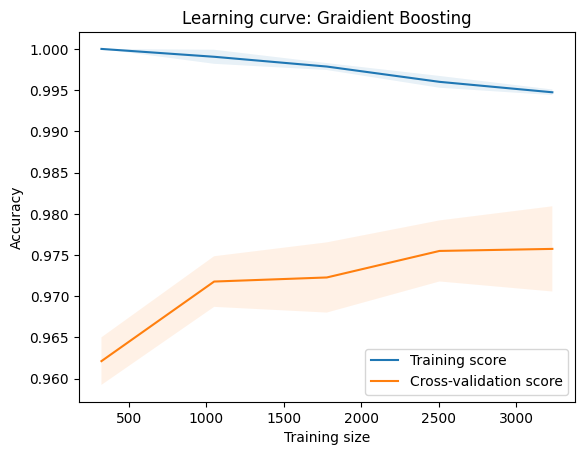

In [74]:
plot_learning_curve(best_gb_model, np.concatenate((X_train, X_test), axis=0), np.concatenate((y_train, y_test), axis=0), "Learning curve: Graidient Boosting")

In [75]:
y_train_pred_gb = best_gb_model.predict(X_train)
train_acc = accuracy_score(y_train_pred_gb, y_train)
print(f"Train accuracy: {train_acc}")

Train accuracy: 0.9953589108910891


Test accuracy: 0.9801980198019802
The model has a good balance between bias and variance.
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       540
           1       0.97      0.97      0.97       268

    accuracy                           0.98       808
   macro avg       0.98      0.98      0.98       808
weighted avg       0.98      0.98      0.98       808



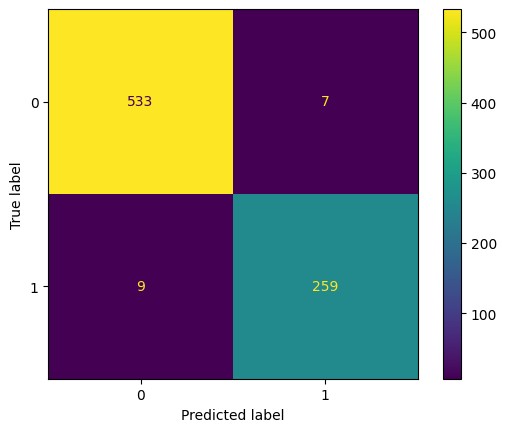

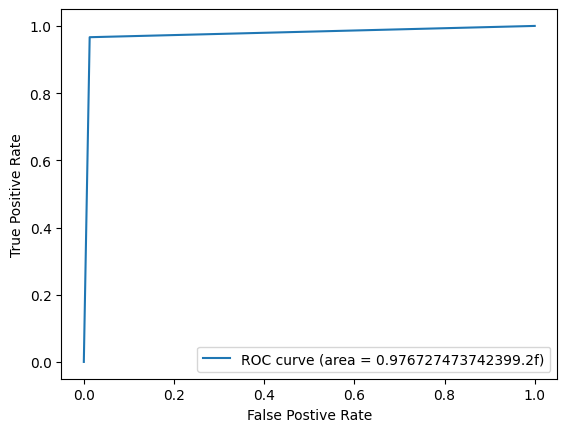

In [76]:
y_pred_gb = best_gb_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_gb)

print(f"Test accuracy: {test_acc}")

check_model(train_acc, test_acc)

print("Classification Report:\n",classification_report(y_test,y_pred_gb))

cm = confusion_matrix(y_test, y_pred_gb, labels=best_gb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=best_gb_model.classes_)
disp.plot()
plt.show()

#RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
#plt.show()  

plot_roc_curve(y_test, y_pred_gb, best_gb_model)

Support Vector Machine with "radial basis function" kernel

In [77]:
cv_results = cross_validate(estimator=best_svm_model,
                        X = np.concatenate((X_train, X_test), axis=0),
                        y = np.concatenate((y_train, y_test), axis=0),
                        cv = kfold,
                        scoring=scoring,
                        return_train_score=True)

In [78]:
for metric in scoring:
   print(f"{metric.capitalize()} (Train): {cv_results['train_' + metric].mean():.4f} ± {cv_results['train_' + metric].std():.4f}")
   print(f"{metric.capitalize()} (Test): {cv_results['test_' + metric].mean():.4f} ± {cv_results['test_' + metric].std():.4f}")

Accuracy (Train): 0.9793 ± 0.0010
Accuracy (Test): 0.9718 ± 0.0039
Precision (Train): 0.9637 ± 0.0038
Precision (Test): 0.9547 ± 0.0132
Recall (Train): 0.9743 ± 0.0015
Recall (Test): 0.9611 ± 0.0163
F1 (Train): 0.9689 ± 0.0015
F1 (Test): 0.9577 ± 0.0046


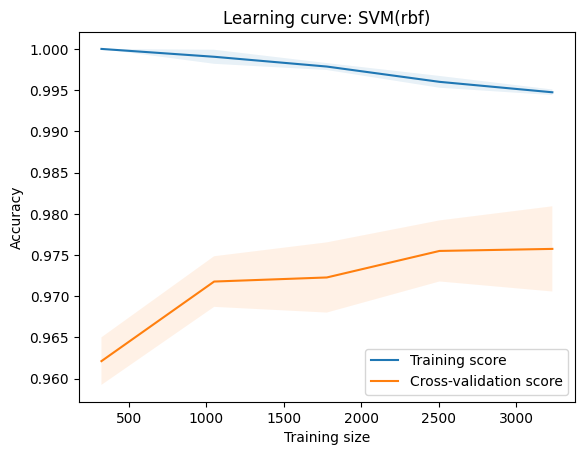

In [79]:
plot_learning_curve(best_gb_model, np.concatenate((X_train, X_test), axis=0), np.concatenate((y_train, y_test), axis=0), "Learning curve: SVM(rbf)")

In [80]:
y_train_pred_svm = best_svm_model.predict(X_train)
train_acc = accuracy_score(y_train_pred_svm, y_train)

print(f"Train accuracy: {train_acc}")

Train accuracy: 0.9789603960396039


Test accuracy: 0.9727722772277227
The model has a good balance between bias and variance.
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.95      0.97      0.96       268

    accuracy                           0.97       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.97      0.97      0.97       808



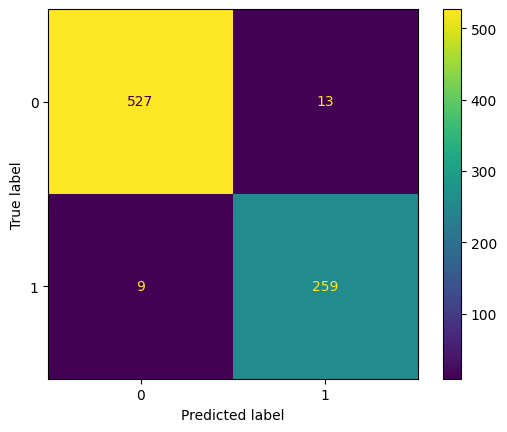

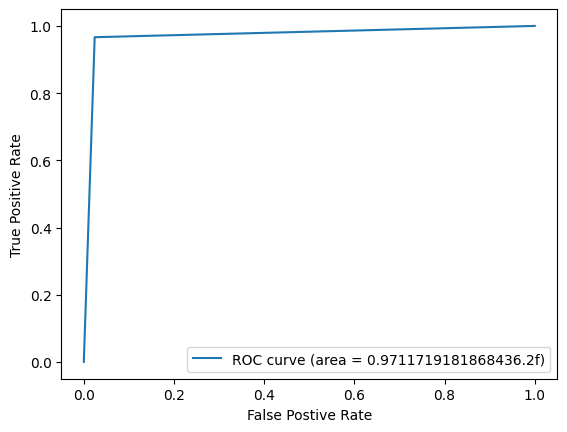

In [81]:
y_pred_svm = best_svm_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_svm)

print(f"Test accuracy: {test_acc}")

check_model(train_acc, test_acc)

print("Classification Report:\n",classification_report(y_test,y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=best_svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=best_svm_model.classes_)
disp.plot()
plt.show()

#RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
#plt.show()  

plot_roc_curve(y_test, y_pred_svm, best_svm_model)

Logistic Regression

In [82]:
cv_results = cross_validate(estimator=best_lr_model,
                        X = np.concatenate((X_train, X_test), axis=0),
                        y = np.concatenate((y_train, y_test), axis=0),
                        cv = kfold,
                        scoring=scoring,
                        return_train_score=True)

In [83]:
for metric in scoring:
   print(f"{metric.capitalize()} (Train): {cv_results['train_' + metric].mean():.4f} ± {cv_results['train_' + metric].std():.4f}")
   print(f"{metric.capitalize()} (Test): {cv_results['test_' + metric].mean():.4f} ± {cv_results['test_' + metric].std():.4f}")

Accuracy (Train): 0.9572 ± 0.0022
Accuracy (Test): 0.9572 ± 0.0078
Precision (Train): 0.9144 ± 0.0029
Precision (Test): 0.9152 ± 0.0164
Recall (Train): 0.9612 ± 0.0027
Recall (Test): 0.9608 ± 0.0119
F1 (Train): 0.9372 ± 0.0027
F1 (Test): 0.9373 ± 0.0101


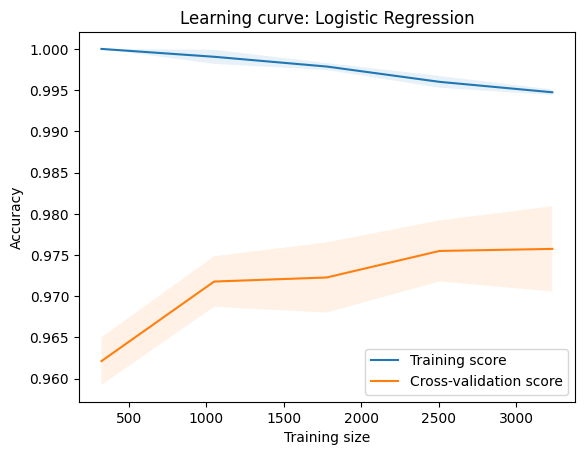

In [84]:
plot_learning_curve(best_gb_model, np.concatenate((X_train, X_test), axis=0), np.concatenate((y_train, y_test), axis=0), "Learning curve: Logistic Regression")

In [85]:
y_train_pred_lr = best_lr_model.predict(X_train)
train_acc = accuracy_score(y_train_pred_lr, y_train)
print(f"Train accuracy: {train_acc}")

Train accuracy: 0.9557549504950495


Test accuracy: 0.9628712871287128
The model has a good balance between bias and variance.
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       540
           1       0.93      0.97      0.95       268

    accuracy                           0.96       808
   macro avg       0.95      0.96      0.96       808
weighted avg       0.96      0.96      0.96       808



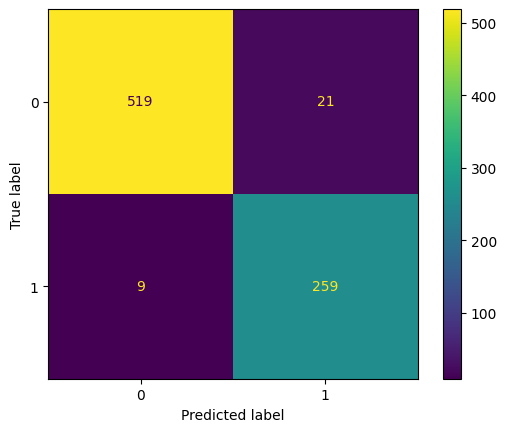

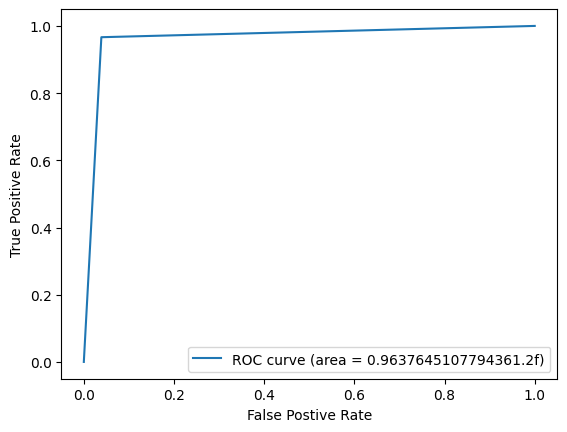

In [86]:
y_pred_lr = best_lr_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_lr)

print(f"Test accuracy: {test_acc}")

check_model(train_acc, test_acc)

print("Classification Report:\n",classification_report(y_test,y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr, labels=best_lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=best_lr_model.classes_)
disp.plot()
plt.show()

#RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
#plt.show()  

plot_roc_curve(y_test, y_pred_lr, best_lr_model)

### It can be concluded that, SVM with rbf is the best performing model.

In [87]:
def make_prediction(input_sample, Model):
    pred = Model.predict(input_sample)

    return pred

In [88]:
import random

random.seed(42)

In [89]:
sample = random.randint(0, X_test.shape[0])
print(sample)

654


In [90]:
X_test[sample][:]

array([-1.00966393, -0.18503786, -0.57103371,  0.387195  , -0.18475453])

In [91]:
input_sample = X_test[sample][:]
type(input_sample), input_sample.shape, X_test.shape

(numpy.ndarray, (5,), (808, 5))

In [92]:
pred = make_prediction([input_sample],best_svm_model)
print(f"accuracy:{accuracy_score(pred, [y_test[sample]])}")
print(pred, y_test[sample])

accuracy:1.0
[0] 0


In [93]:
pred = make_prediction([input_sample],best_lr_model)
print(f"accuracy:{accuracy_score(pred, [y_test[sample]])}")
print(pred, y_test[sample])

accuracy:1.0
[0] 0


In [94]:
pred = make_prediction([input_sample],best_gb_model)
print(f"accuracy:{accuracy_score(pred, [y_test[sample]])}")
print(pred, y_test[sample])

accuracy:1.0
[0] 0


In [95]:
pred = make_prediction([input_sample],best_gb_model)
print(f"accuracy:{balanced_accuracy_score(pred, [y_test[sample]], )}")
print(pred, y_test[sample])


accuracy:1.0
[0] 0


c:\Users\338575\new_env\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### Final Model Deployment

In [96]:
import joblib

In [97]:
joblib.dump(best_svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [98]:
loaded_model = joblib.load('svm_model.pkl')

# SHAP library experimentation

In [99]:
import shap

In [100]:
df_cleaned.columns # CO > Proximity > Temp > NO2 > SO2


Index(['Temperature', 'Humidity', 'NO2', 'CO', 'Proximity_to_Industrial_Areas',
       'Population_Density', 'PM_combined_log', 'SO2_log'],
      dtype='object')

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'shap.explainers._kernel.KernelExplainer'>


  0%|          | 0/500 [00:00<?, ?it/s]

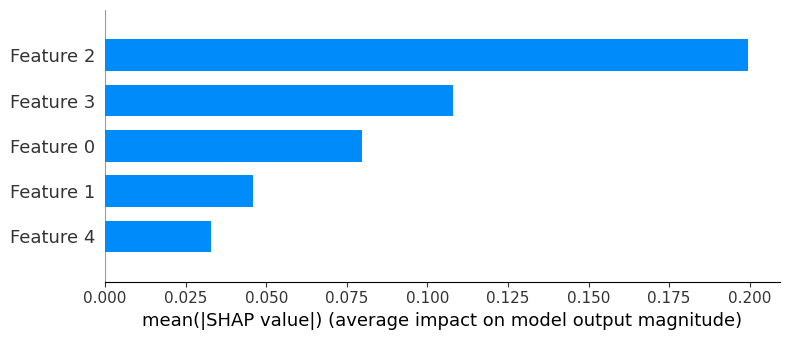

In [101]:
explainer = shap.KernelExplainer(best_svm_model.predict, shap.sample(X_train, 500))
print(type(explainer))
shap_values = explainer.shap_values(shap.sample(X_train, 500))
shap.summary_plot(shap_values, shap.sample(X_train, 500), plot_type="bar")

In [102]:
print(shap_values)
print(shap_values.shape)

[[-0.05013333 -0.05713333 -0.13363333 -0.06346667 -0.03563333]
 [-0.06943333 -0.01926667 -0.15793333 -0.0716     -0.02176667]
 [ 0.20973333  0.03673333  0.2719      0.11473333  0.0269    ]
 ...
 [-0.00213333 -0.07896667 -0.15596667 -0.03813333 -0.0648    ]
 [-0.0873     -0.02746667 -0.16296667 -0.0653      0.00303333]
 [-0.0859     -0.01673333 -0.1444     -0.07206667 -0.0209    ]]
(500, 5)


In [ ]:
explainer = shap.KernelExplainer(best_svm_model.predict, shap.sample(X_test, 300))
print(type(explainer))
shap_values = explainer.shap_values(shap.sample(X_test, 300))
shap.summary_plot(shap_values, shap.sample(X_test, 300), plot_type="bar")

In [ ]:
explainer.explain(shap_values)

array([-0.05094444, -0.05177778, -0.11511111, -0.04483333, -0.074     ])

In [ ]:
explainer.explain_row(shap_values)

In [147]:
# If SHAP values are an Explanation object, extract the values
try:
    if isinstance(shap_values, shap.Explanation):
        print("successfully extracted")
        shap_values = shap_values.values
    print("got stuck")
except:
    print("not an explnation object")

got stuck


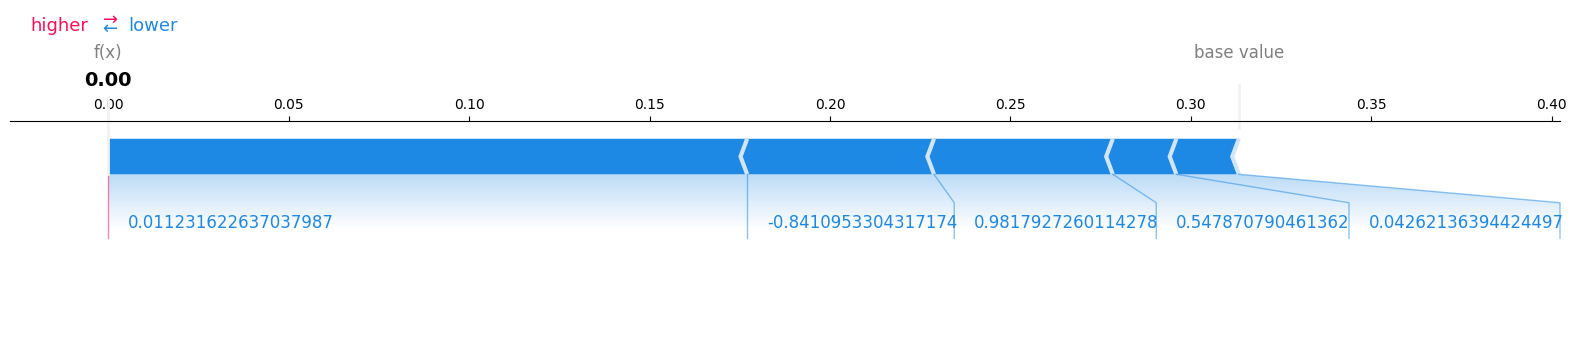

0


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[5], X_test[0, :], matplotlib=True)
print(y_test[0])

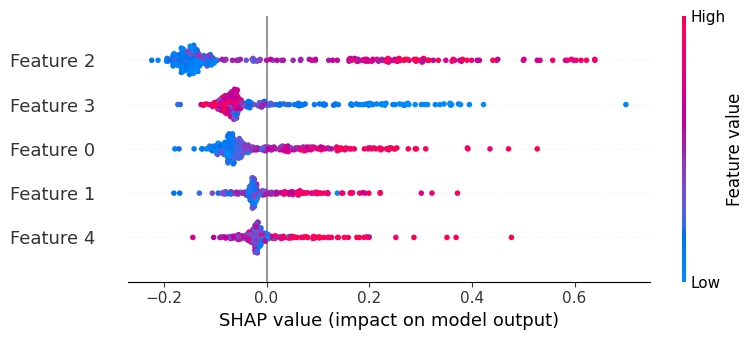

In [160]:
shap.summary_plot(shap_values, shap.sample(X_test, 300))

0
0.3133333333333333


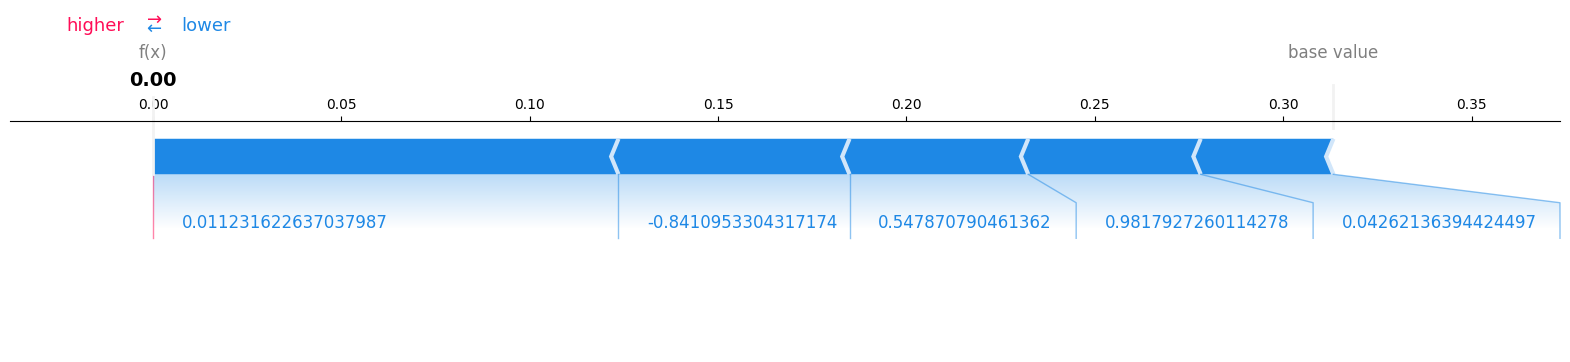

0
0.3133333333333333


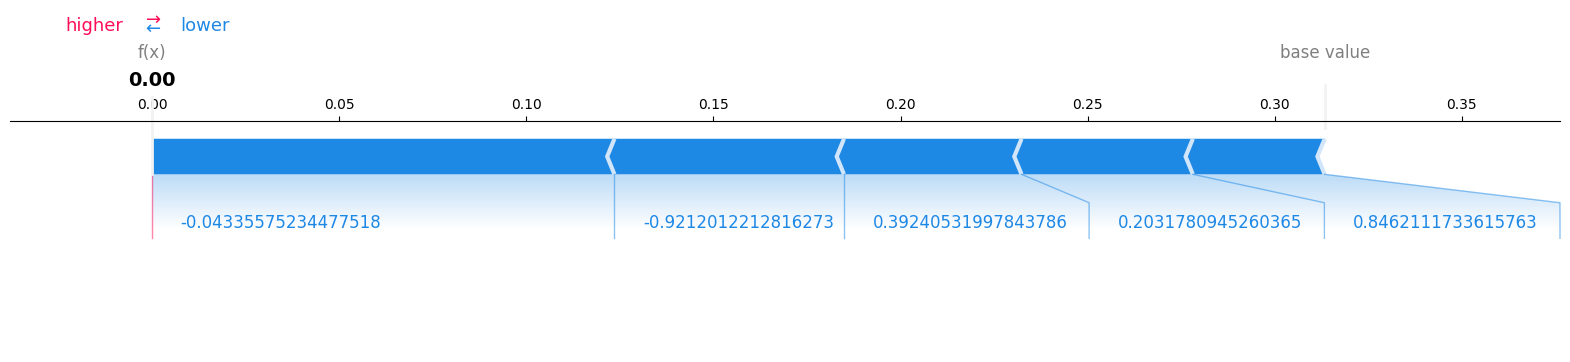

0
0.3133333333333333


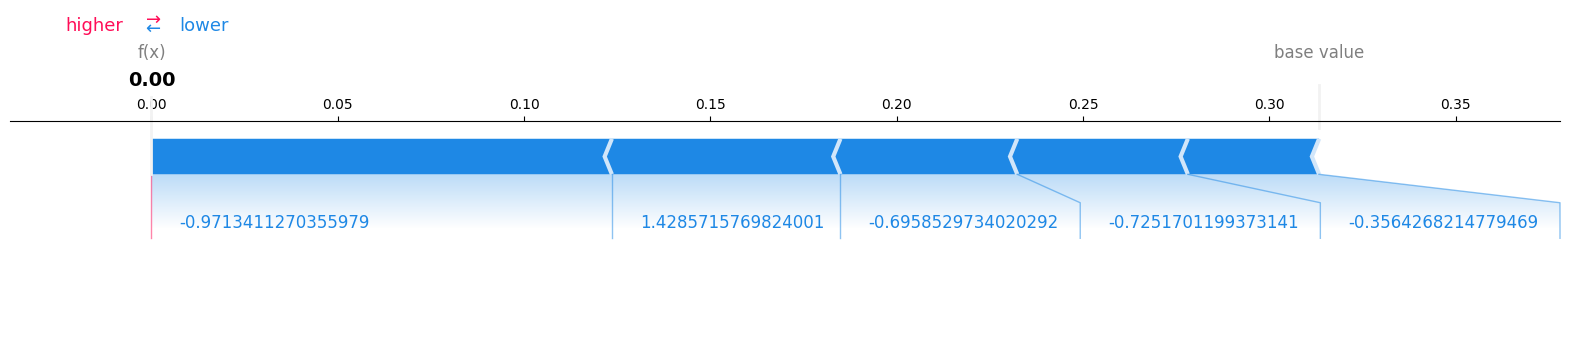

1
0.3133333333333333


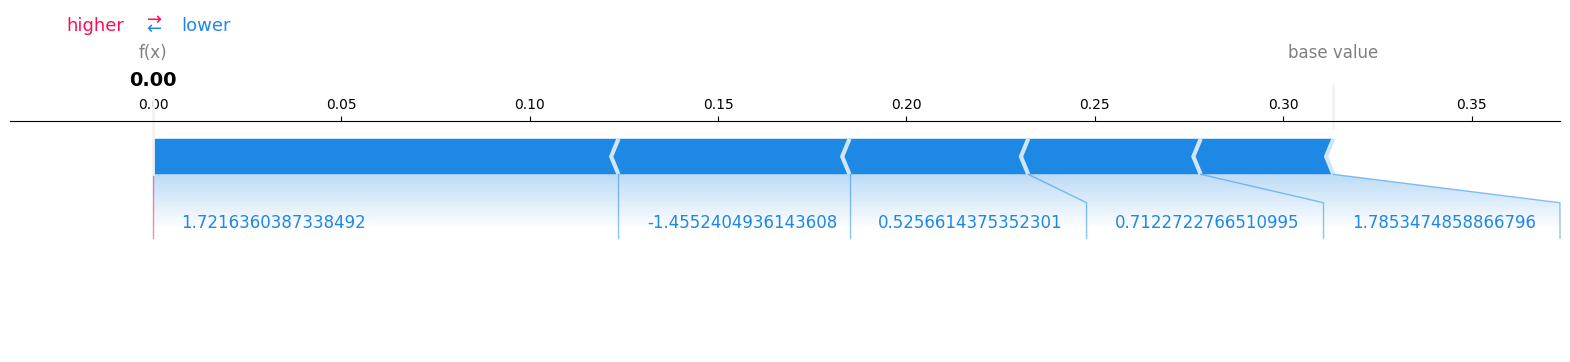

0
0.3133333333333333


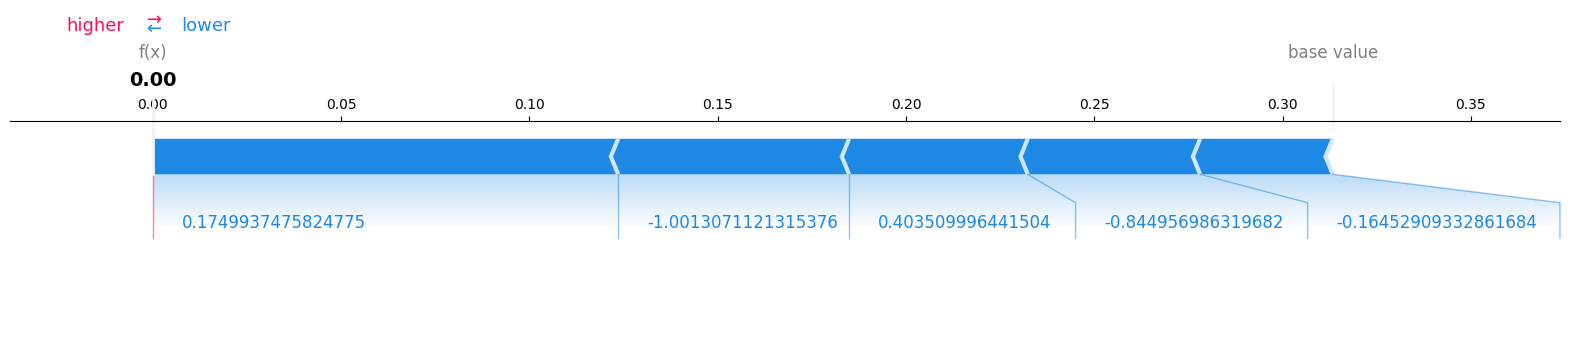

0
0.3133333333333333


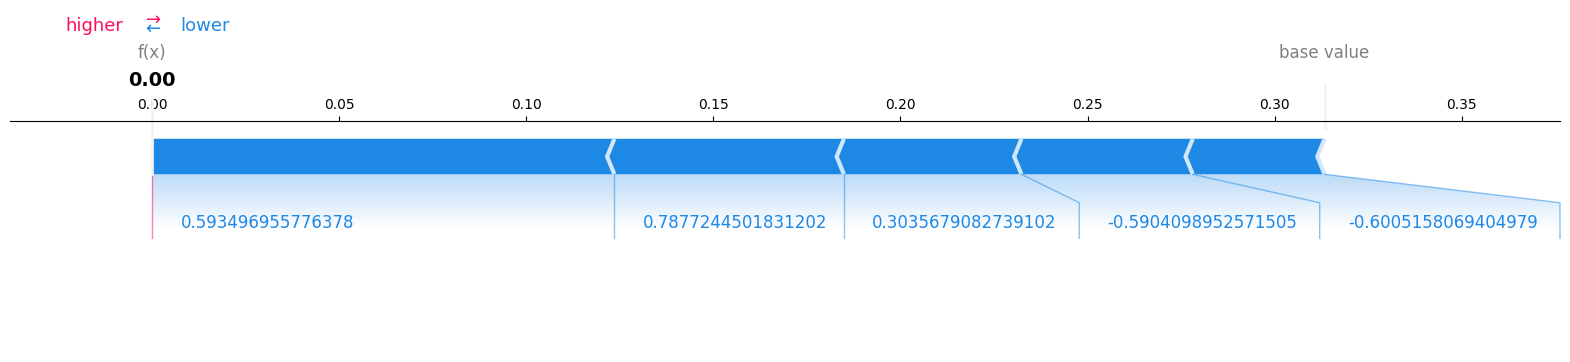

0
0.3133333333333333


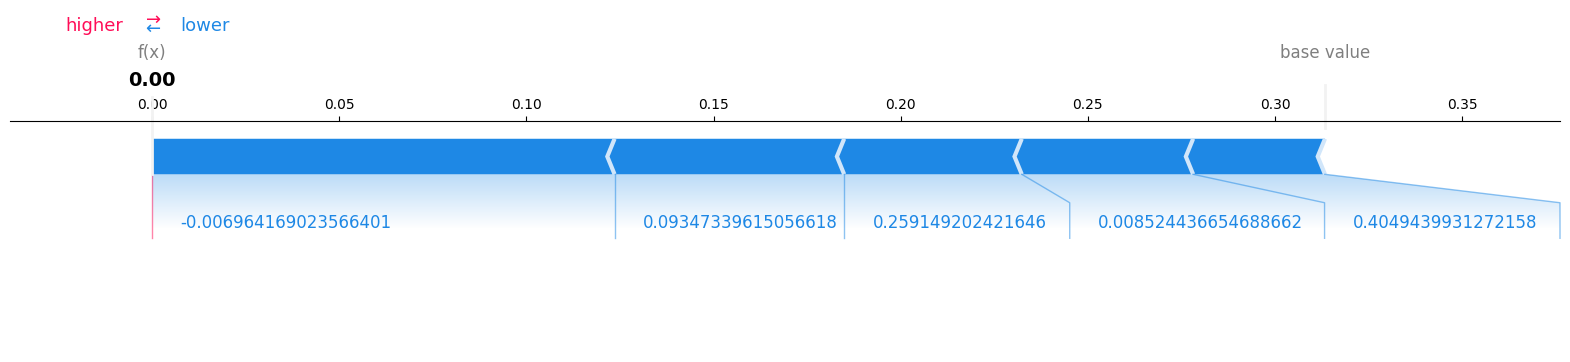

0
0.3133333333333333


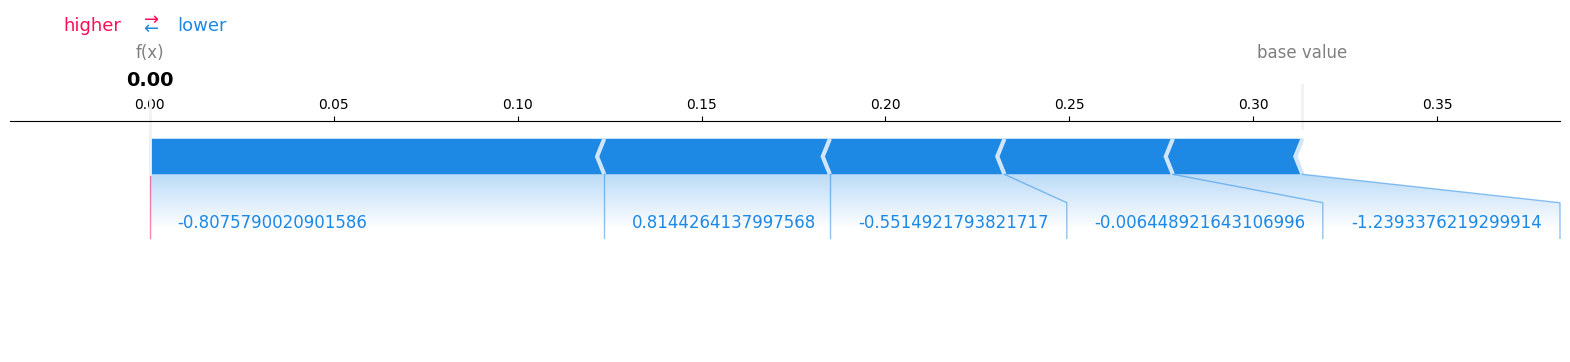

1
0.3133333333333333


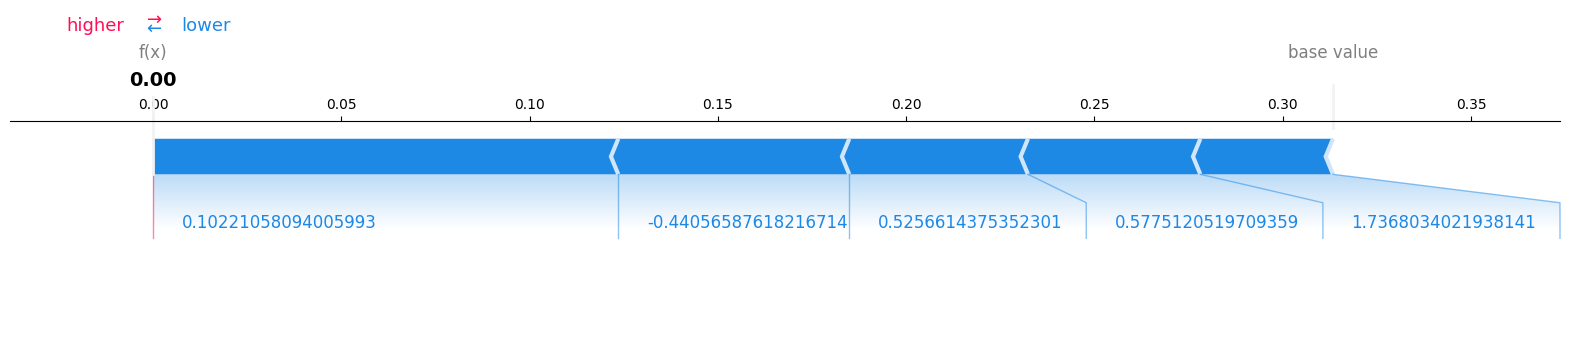

0
0.3133333333333333


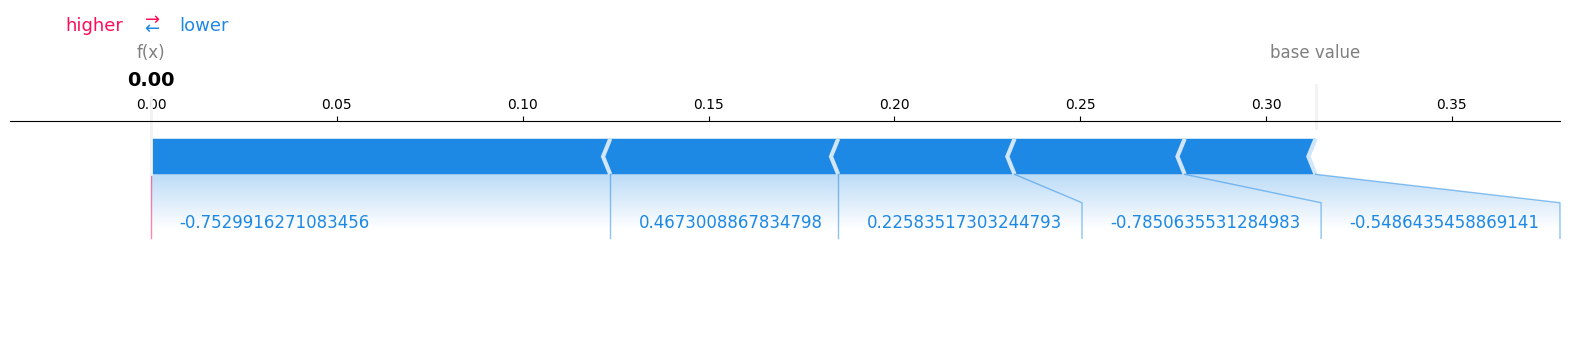

1
0.3133333333333333


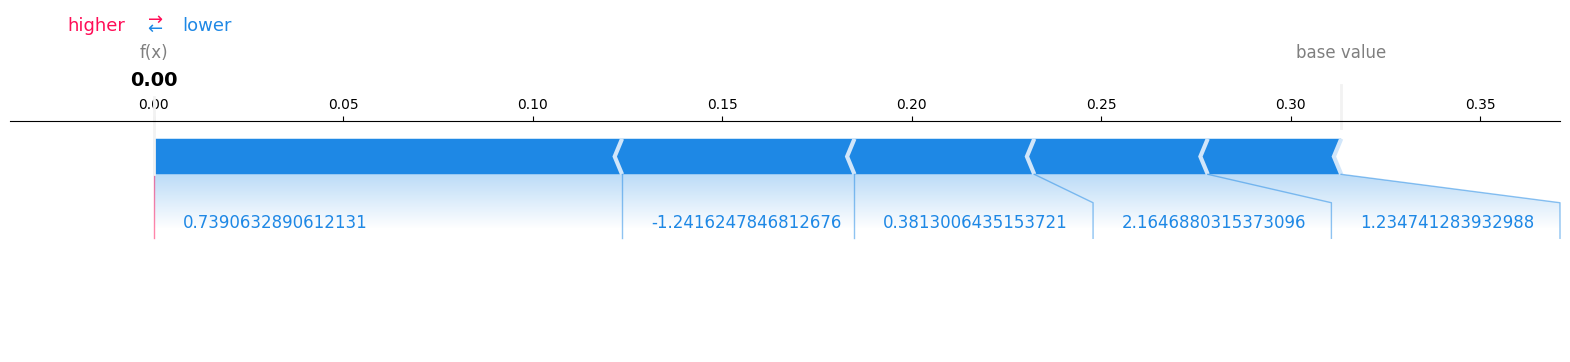

0
0.3133333333333333


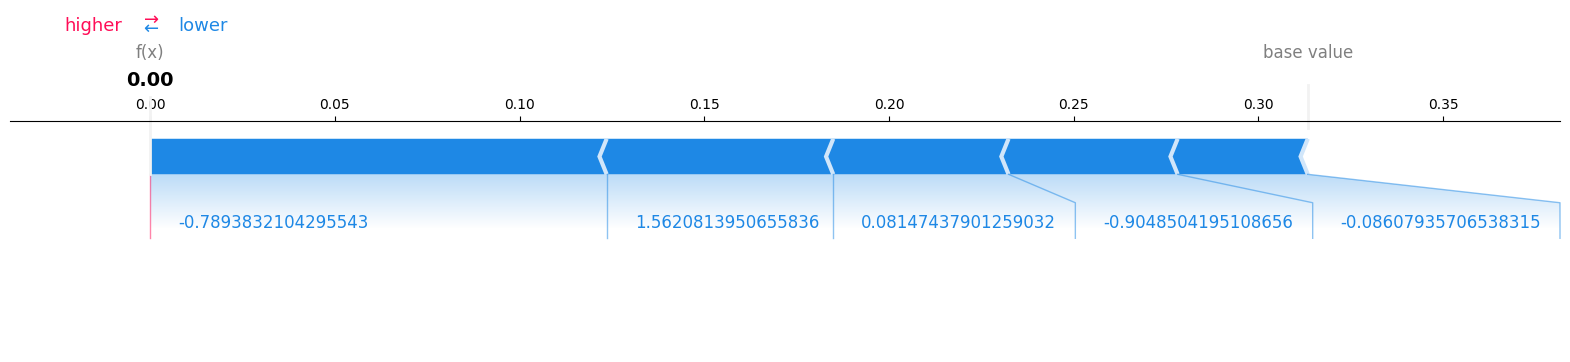

1
0.3133333333333333


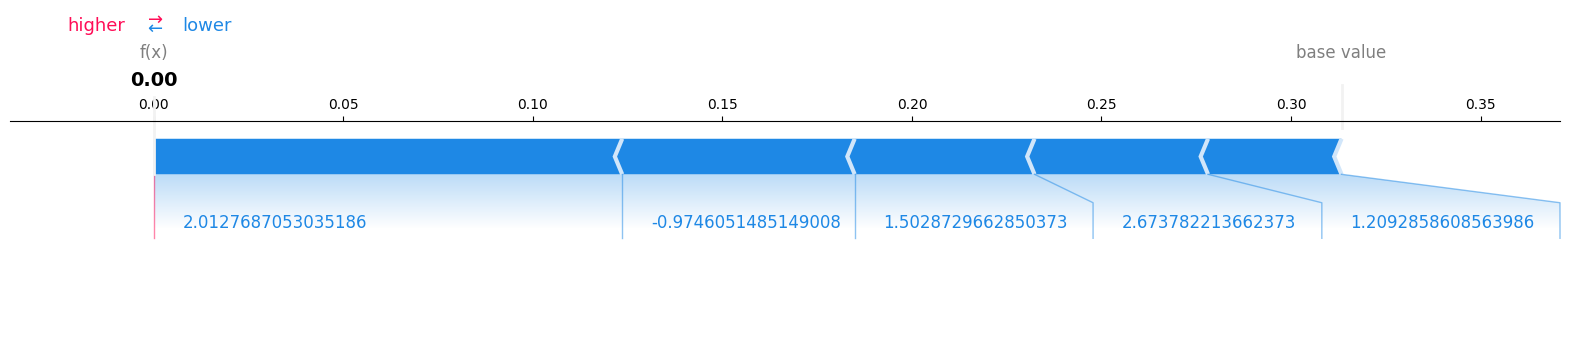

1
0.3133333333333333


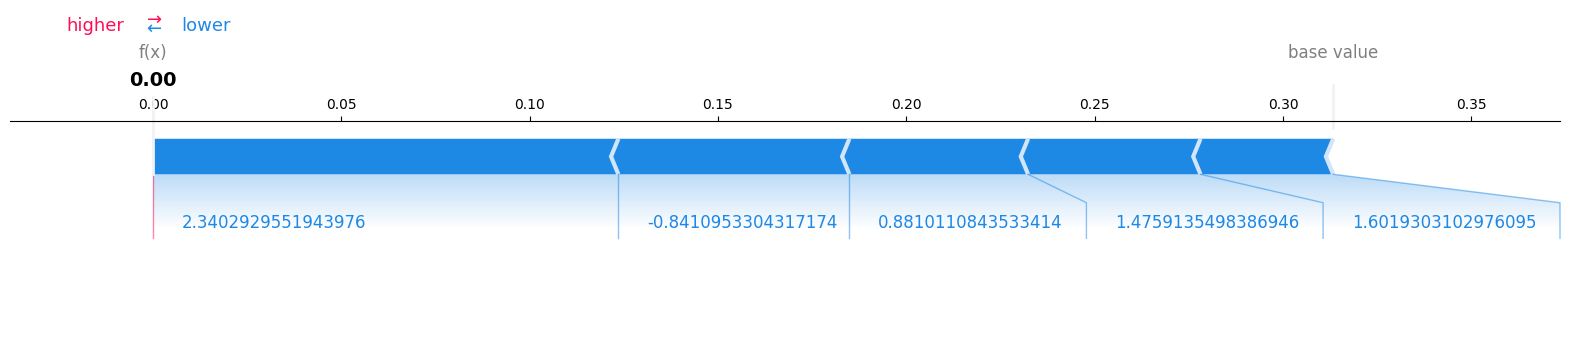

0
0.3133333333333333


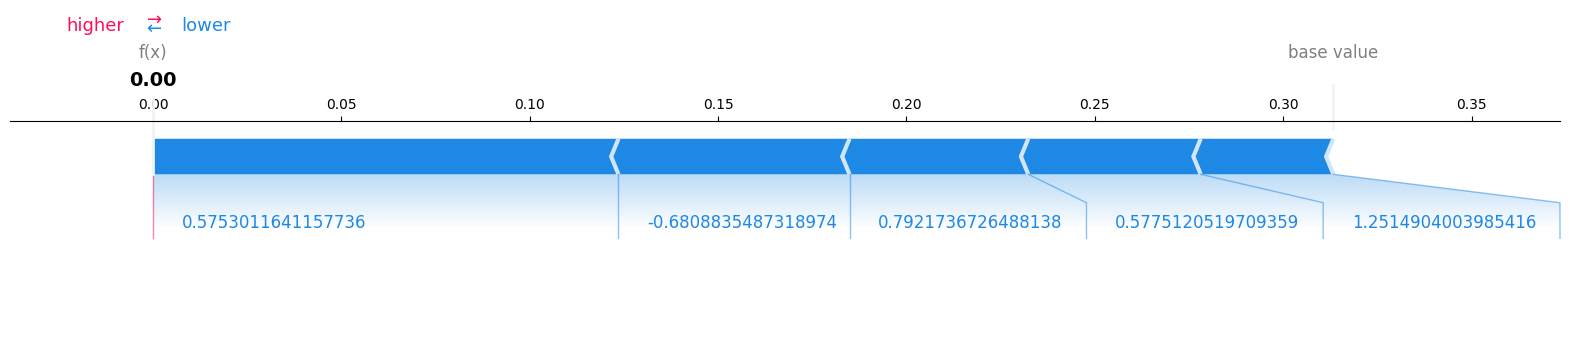

0
0.3133333333333333


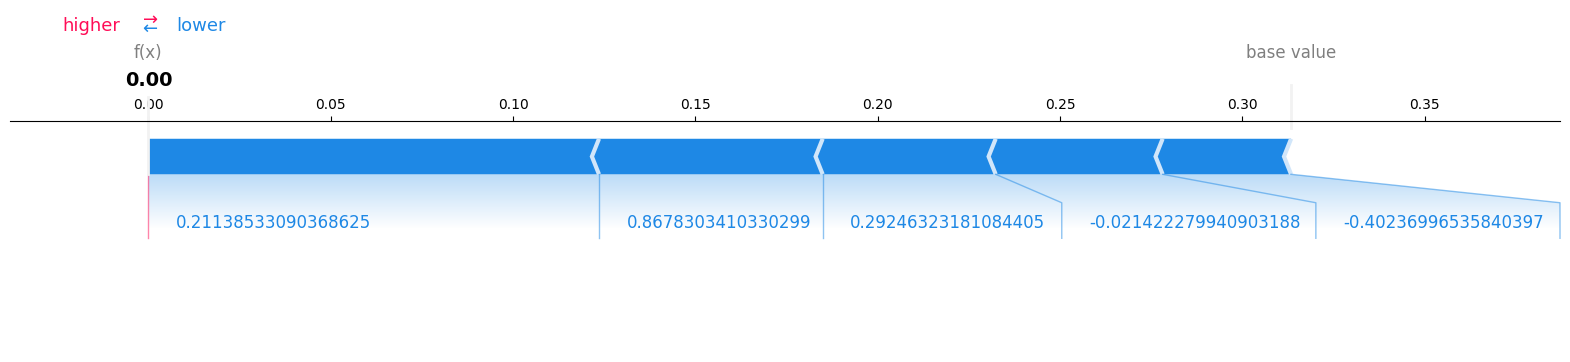

1
0.3133333333333333


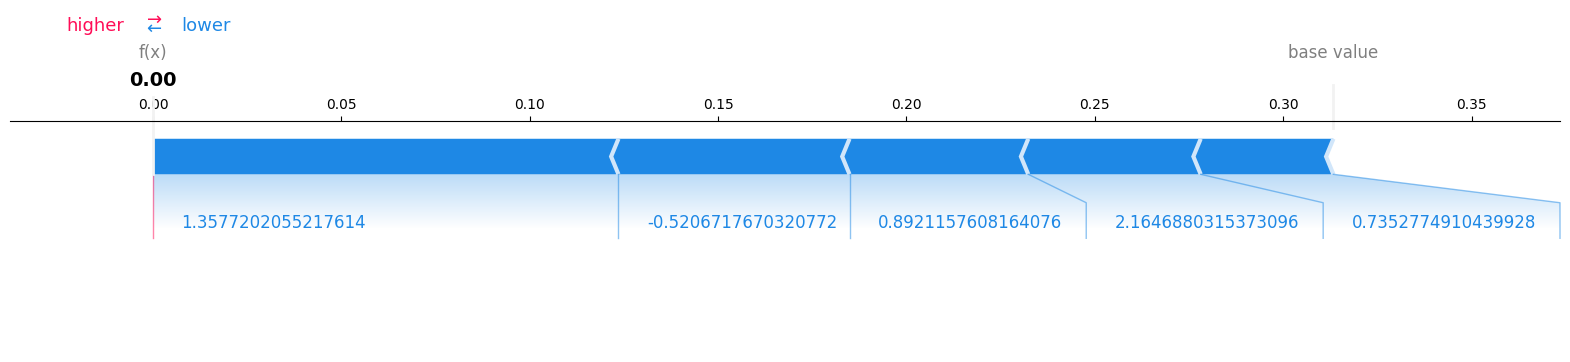

0
0.3133333333333333


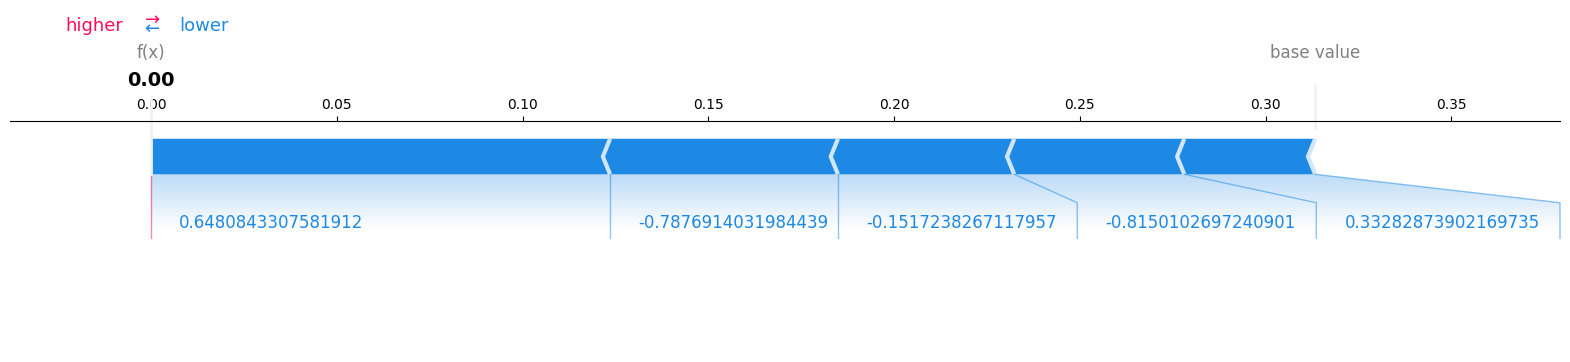

1
0.3133333333333333


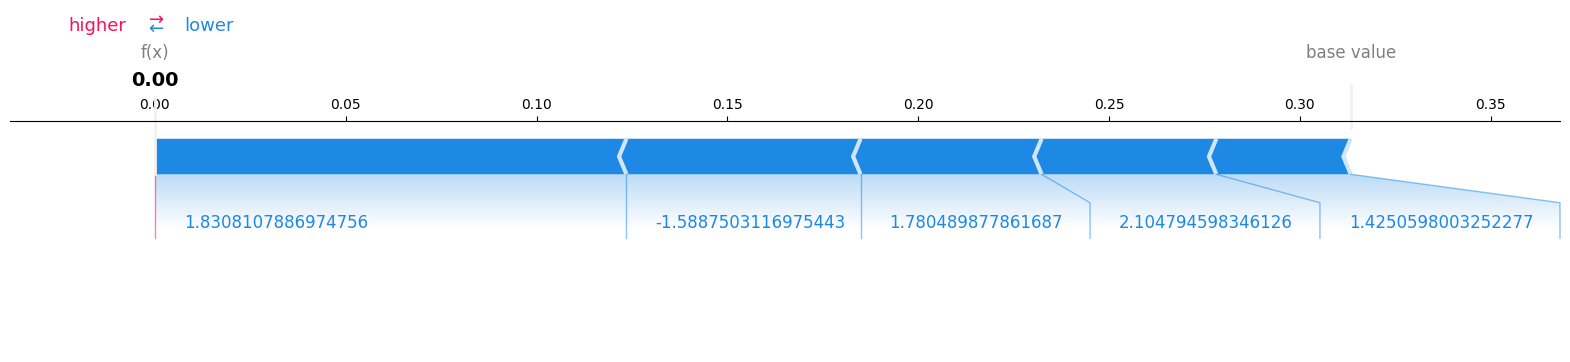

0
0.3133333333333333


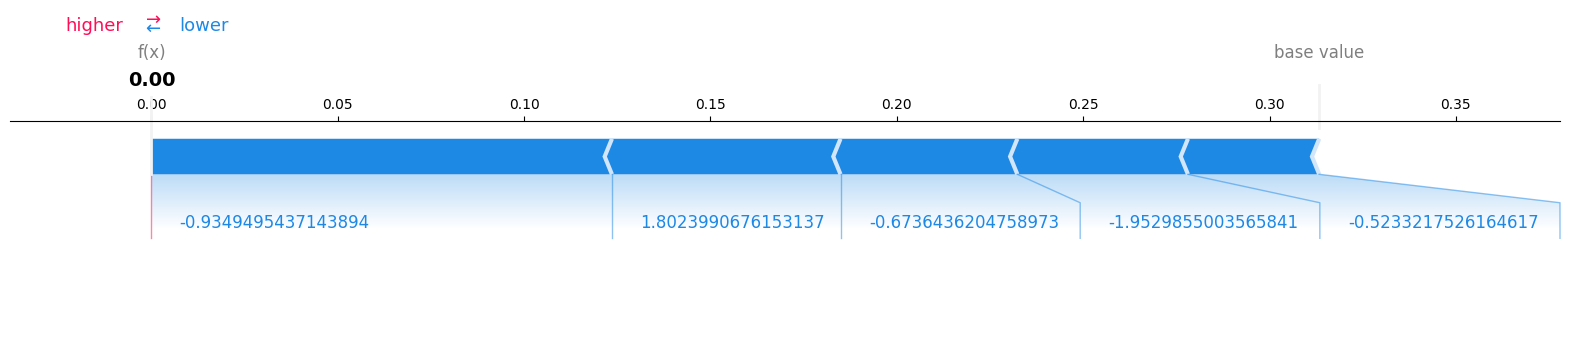

In [158]:
# If shap_values is an Explanation object, extract the values
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values

# Initialize the SHAP JavaScript library
shap.initjs()

# Visualize the first 100 observations
for i in range(5):
    print(y_test[i])
    print(explainer.expected_value)
    shap.force_plot(explainer.expected_value, shap_values[0], X_test[i, :], matplotlib=True)

In [ ]:
#shap.waterfall_plot(explainer.explain(shap_values))

In [ ]:
# Waterfall plot for the first observation
#shap.plots.waterfall(shap_values[0])

In [ ]:
#best_svm_model.save_model('best_model.json')

In [ ]:
#loaded_model = xgb.XGBRegressor()
#loaded_model.load_model('model.json')

In [ ]:
# SHAP Explainer
#explainer = shap.Explainer(loaded_model)
#shap_values = explainer(X_test)

# Initialize the SHAP JavaScript library
#shap.initjs()